# general (no show)

This chunk is about loading and mutating dataframes.

### loading (no show)

In [1]:

# region wise analysis imports
import folium
from folium.plugins import MarkerCluster

# sklearn imports
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.cluster import AffinityPropagation
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.decomposition import NMF

# topic analysis imports and word cloud imports
import pandas as pd 
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import gensim
import gensim.corpora as corpora
import re
import numpy as np
from pprint import pprint
import pyLDAvis
import pyLDAvis.gensim
pyLDAvis.enable_notebook()

import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

from wordcloud import WordCloud

# sns plots

from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# network visualization

from itertools import combinations
import networkx as nx
from nxviz import CircosPlot

# imports for survey analyses

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
%matplotlib inline

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 999

import datetime

import pytz

import ast

# detailed summaries

import sweetviz as sv

/home/mrinalmanu/miniconda3/envs/lda/lib/python3.10/site-packages/nxviz/__init__.py:18: UserWarning: 
nxviz has a new API! Version 0.7.3 onwards, the old class-based API is being
deprecated in favour of a new API focused on advancing a grammar of network
graphics. If your plotting code depends on the old API, please consider
pinning nxviz at version 0.7.3, as the new API will break your old code.

To check out the new API, please head over to the docs at
https://ericmjl.github.io/nxviz/ to learn more. We hope you enjoy using it!

(This deprecation message will go away in version 1.0.)

  warnings.warn(


#### value name and code name dataframe

Value name for composite ones and demographics
and Code name for non composite ones

In [2]:
mcr_df = pd.read_csv("/home/mrinalmanu/Documents/iglas_le/iGLAS-LE For Mrinal - value names.csv", low_memory=False)
metadata = pd.read_csv("/home/mrinalmanu/Documents/iglas_le/metadata.csv", sep=':', low_memory=False)
col_dg = ['Progress', 'UserLanguage', 'Collection']
col_all = metadata['Variable']
# annotation dataframe
mcr_df_ann = mcr_df[mcr_df.columns & col_dg]
# all variable
mcr_df_all = mcr_df[mcr_df.columns & col_all]
# all annotated
mcr_df_all_n = pd.concat([mcr_df_ann, mcr_df_all], axis=1)
mcr_df_all_n["id"] = mcr_df_all_n.index
ncol_dg = ['id', 'Progress', 'UserLanguage', 'Collection']
dfx = pd.melt(mcr_df_all_n, id_vars=list(ncol_dg))
dfx["Variable"] = dfx["variable"]
del dfx["variable"]


/tmp/ipykernel_15676/2273107825.py:6: FutureWarning:

Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead.

/tmp/ipykernel_15676/2273107825.py:8: FutureWarning:

Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead.



In [3]:
t_all = pd.merge(dfx, metadata, on='Variable')


In [4]:
values_t_all = t_all

In [5]:
values_t_all

,id,Progress,UserLanguage,Collection,value,Variable,Description,Option,Group,Composite,Tag
0,0,100,RU,Pilot,Female,LE2.001,Gender,Male_Female_non_binary_other,60,Yes,General
1,1,100,RU,Pilot,Female,LE2.001,Gender,Male_Female_non_binary_other,60,Yes,General
2,2,100,RU,Pilot,Female,LE2.001,Gender,Male_Female_non_binary_other,60,Yes,General
3,3,100,RU,Pilot,Male,LE2.001,Gender,Male_Female_non_binary_other,60,Yes,General
4,4,4,RU,Pilot,Male,LE2.001,Gender,Male_Female_non_binary_other,60,Yes,General
...,...,...,...,...,...,...,...,...,...,...,...
456241,1912,37,ES-ES,Spanish Collection,,LE3.201,Genetics experts must actively contribute to,Revising and updating ethical guidelines conce...,19,No,HR
456242,1913,12,ES-ES,Spanish Collection,,LE3.201,Genetics experts must actively contribute to,Revising and updating ethical guidelines conce...,19,No,HR
456243,1914,19,ES-ES,Spanish Collection,,LE3.201,Genetics experts must actively contribute to,Revising and updating ethical guidelines conce...,19,No,HR
456244,1915,37,ES-ES,Spanish Collection,,LE3.201,Genetics experts must actively contribute to,Revising and updating ethical guidelines conce...,19,No,HR


In [6]:
mcr_df = pd.read_csv("/home/mrinalmanu/Documents/iglas_le/iGLAS-LE.csv", low_memory=False)
# all variable
mcr_df_all = mcr_df[mcr_df.columns & col_all]
# all annotated
mcr_df_all_n = pd.concat([mcr_df_ann, mcr_df_all], axis=1)
mcr_df_all_n["id"] = mcr_df_all_n.index
ncol_dg = ['id', 'Progress', 'UserLanguage', 'Collection']
dfx = pd.melt(mcr_df_all_n, id_vars=list(ncol_dg))
dfx["Variable"] = dfx["variable"]
del dfx["variable"]
t_all = pd.merge(dfx, metadata, on='Variable')
codes_t_all = t_all

/tmp/ipykernel_15676/4124559780.py:3: FutureWarning:

Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead.



In [7]:
codes_t_all

,id,Progress,UserLanguage,Collection,value,Variable,Description,Option,Group,Composite,Tag
0,0,100,RU,Pilot,2,LE2.001,Gender,Male_Female_non_binary_other,60,Yes,General
1,1,100,RU,Pilot,2,LE2.001,Gender,Male_Female_non_binary_other,60,Yes,General
2,2,100,RU,Pilot,2,LE2.001,Gender,Male_Female_non_binary_other,60,Yes,General
3,3,100,RU,Pilot,1,LE2.001,Gender,Male_Female_non_binary_other,60,Yes,General
4,4,4,RU,Pilot,1,LE2.001,Gender,Male_Female_non_binary_other,60,Yes,General
...,...,...,...,...,...,...,...,...,...,...,...
456241,1912,37,ES-ES,Spanish Collection,,LE3.201,Genetics experts must actively contribute to,Revising and updating ethical guidelines conce...,19,No,HR
456242,1913,12,ES-ES,Spanish Collection,,LE3.201,Genetics experts must actively contribute to,Revising and updating ethical guidelines conce...,19,No,HR
456243,1914,19,ES-ES,Spanish Collection,,LE3.201,Genetics experts must actively contribute to,Revising and updating ethical guidelines conce...,19,No,HR
456244,1915,37,ES-ES,Spanish Collection,,LE3.201,Genetics experts must actively contribute to,Revising and updating ethical guidelines conce...,19,No,HR


### all composites (no show)

In [8]:
gr_df = codes_t_all
comp_df = gr_df
#filter all empty strings from values
comp_df["value"] = comp_df["value"].map(str)
filter = comp_df["value"] != ' '
ndf = comp_df[filter]
filter = ndf["Composite"] == 'Yes'
new_df = ndf[filter]
new_df['Group'].unique()

array([60, 33, 34, 35, 36, 37, 39, 20, 44, 46, 47, 48, 49, 51, 52, 55, 56,
        2,  4,  5,  7, 23, 10, 11, 12, 14, 15, 25, 30])

In [9]:
# delete datframe rows that do not contain a number string
new_df = new_df[new_df['value'].apply(lambda x: str(x).isdigit())]
new_df['value'].unique()

array(['2', '1', '3', '4', '5', '6', '7', '8', '30', '22', '27', '16',
       '9', '26', '25', '19', '17', '18', '12', '32', '28', '20', '21',
       '13', '10', '15', '29', '11', '31', '14', '142', '161', '111',
       '40', '88', '181', '133', '189', '126', '37', '35', '78', '182',
       '79', '36', '92', '185', '169', '183', '94', '61', '46', '140',
       '53', '80', '159', '43', '187', '84', '167', '136', '48', '60',
       '82', '58', '65', '129', '139', '178', '177', '146', '122', '77',
       '83', '170', '156', '45'], dtype=object)

In [10]:
ndf = new_df

In [11]:
### 37
filter = ndf["Group"] == 37
ndf_37 = ndf[filter]
ndf_37['value'].replace('1','Not applicable',inplace=True)
ndf_37['value'].replace('2','Charity sector',inplace=True)
ndf_37['value'].replace('3','Construction and maintenance',inplace=True)
ndf_37['value'].replace('4','Education',inplace=True)
ndf_37['value'].replace('5','Engineering Computing and ICT',inplace=True)
ndf_37['value'].replace('6','Communication Advertising and Marketing',inplace=True)
ndf_37['value'].replace('7','Farming and agricultural',inplace=True)
ndf_37['value'].replace('17','Genetics',inplace=True)
ndf_37['value'].replace('8','Governmental employee',inplace=True)
ndf_37['value'].replace('9','Housing and accommodation',inplace=True)
ndf_37['value'].replace('10','Law',inplace=True)
ndf_37['value'].replace('11','Management',inplace=True)
ndf_37['value'].replace('12','Medicine',inplace=True)
ndf_37['value'].replace('13','Retired',inplace=True)
ndf_37['value'].replace('14','Sales and office work',inplace=True)
ndf_37['value'].replace('15','Science and research',inplace=True)
ndf_37['value'].replace('16','Other',inplace=True)

In [12]:
#### 23
filter = ndf["Group"] == 23
ndf_23 = ndf[filter]
ndf_23['Option'] = ndf_23['Option']


In [13]:
### 25
filter = ndf["Group"] == 25
ndf_25 = ndf[filter]
ndf_25['value'].replace('1','Yes',inplace=True)
ndf_25['value'].replace('2','No',inplace=True)
ndf_25['value'].replace('3','Do not know',inplace=True)


In [14]:
### 20
filter = ndf["Group"] == 20
ndf_20 = ndf[filter]
ndf_20['value'].replace('1','General Research',inplace=True)
ndf_20['value'].replace('2','Agronomist',inplace=True)
ndf_20['value'].replace('3','Counselling',inplace=True)
ndf_20['value'].replace('4','Law',inplace=True)
ndf_20['value'].replace('5','Medical',inplace=True)
ndf_20['value'].replace('6','Behavioural',inplace=True)
ndf_20['value'].replace('7','Educational',inplace=True)
ndf_20['value'].replace('8','Other',inplace=True)


In [15]:
### 2
filter = ndf["Group"] == 2
ndf_2 = ndf[filter]
ndf_2['value'].replace('1','Yes',inplace=True)
ndf_2['value'].replace('2','No',inplace=True)
ndf_2['value'].replace('3','Do not know',inplace=True)


In [16]:
### 4
filter = ndf["Group"] == 4
ndf_4 = ndf[filter]
ndf_4['value'].replace('1','Yes',inplace=True)
ndf_4['value'].replace('2','No',inplace=True)
ndf_4['value'].replace('3','Do not know',inplace=True)

In [17]:
### 5
filter = ndf["Group"] == 5
ndf_5 = ndf[filter]
ndf_5['value'].replace('1','Yes',inplace=True)
ndf_5['value'].replace('2','No',inplace=True)
ndf_5['value'].replace('3','Do not know',inplace=True)

In [18]:
### 7
filter = ndf["Group"] == 7
ndf_7 = ndf[filter]
ndf_7['value'].replace('1','Yes',inplace=True)
ndf_7['value'].replace('2','No',inplace=True)
ndf_7['value'].replace('3','Do not know',inplace=True)

In [19]:
### 10
filter = ndf["Group"] == 10
ndf_10 = ndf[filter]
ndf_10['value'].replace('1','Increases the risk of discrimination',inplace=True)
ndf_10['value'].replace('2','Reduces the risk of discrimination',inplace=True)
ndf_10['value'].replace('3','Makes no difference to the risk of discrimination',inplace=True)
ndf_10['value'].replace('4','Both increases and decreases the risk of discrimination depending on how genetics data are regulated',inplace=True)
ndf_10['value'].replace('5','Do not know',inplace=True)

In [20]:
### 11
filter = ndf["Group"] == 11
ndf_11 = ndf[filter]
ndf_11['value'].replace('1','Benefits outweigh the risks',inplace=True)
ndf_11['value'].replace('2','Risk outweighs the benefits',inplace=True)
ndf_11['value'].replace('3','Risks and benefits balance each-other out',inplace=True)
ndf_11['value'].replace('4','Do not know',inplace=True)

In [21]:
### 12
filter = ndf["Group"] == 12
ndf_12 = ndf[filter]
ndf_12['value'].replace('1','Always voluntary',inplace=True)
ndf_12['value'].replace('2','Compulsory but under certain circumstances',inplace=True)
ndf_12['value'].replace('3','Do not know',inplace=True)

In [22]:
### 14
filter = ndf["Group"] == 14
ndf_14 = ndf[filter]
ndf_14['value'].replace('1','Yes',inplace=True)
ndf_14['value'].replace('2','No',inplace=True)
ndf_14['value'].replace('3','Not applicable',inplace=True)
ndf_14['value'].replace('4','Do not know',inplace=True)

In [23]:
### 15
filter = ndf["Group"] == 15
ndf_15 = ndf[filter]
ndf_15['value'].replace('1','Sufficient',inplace=True)
ndf_15['value'].replace('2','Insufficient',inplace=True)
ndf_15['value'].replace('3','Do not know',inplace=True)

In [24]:
### 33
filter = ndf["Group"] == 33
ndf_33 = ndf[filter]
ndf_33['value'].replace('1','Pre-GCSE school leavers certificates',inplace=True)
ndf_33['value'].replace('2','GCSE or equivalent school leavers certificates',inplace=True)
ndf_33['value'].replace('3','A-level or equivalent',inplace=True)
ndf_33['value'].replace('4','Undergraduate',inplace=True)
ndf_33['value'].replace('5','Of Master',inplace=True)
ndf_33['value'].replace('6','Doctoral degree',inplace=True)
ndf_33['value'].replace('7','Post-doctoral qualification',inplace=True)

In [25]:
### 34
filter = ndf["Group"] == 34
ndf_34 = ndf[filter]
ndf_34['value'].replace('1','Yes',inplace=True)
ndf_34['value'].replace('2','No',inplace=True)

In [26]:
### 35
filter = ndf["Group"] == 35
ndf_35 = ndf[filter]
ndf_35['value'].replace('1','Art and Design',inplace=True)
ndf_35['value'].replace('2','Ancient History and Archaeology',inplace=True)
ndf_35['value'].replace('3','Biology',inplace=True)
ndf_35['value'].replace('4','Chemistry',inplace=True)
ndf_35['value'].replace('5','Classics',inplace=True)
ndf_35['value'].replace('6','Communication Advertising and Marketing',inplace=True)
ndf_35['value'].replace('7','Economics and Business Studies',inplace=True)
ndf_35['value'].replace('8','Education',inplace=True)
ndf_35['value'].replace('9','Electronics Engineering Computing and ICT',inplace=True)
ndf_35['value'].replace('10','English',inplace=True)
ndf_35['value'].replace('11','Environmental Sciences',inplace=True)
ndf_35['value'].replace('12','Genetics',inplace=True)
ndf_35['value'].replace('13','Geology',inplace=True)
ndf_35['value'].replace('14','Geography',inplace=True)
ndf_35['value'].replace('15','Government and Politics',inplace=True)
ndf_35['value'].replace('16','Health and Social Care',inplace=True)
ndf_35['value'].replace('17','History',inplace=True)
ndf_35['value'].replace('18','Languages',inplace=True)
ndf_35['value'].replace('19','Law',inplace=True)
ndf_35['value'].replace('20','Mathematics',inplace=True)
ndf_35['value'].replace('21','Media Studies',inplace=True)
ndf_35['value'].replace('22','Medicine',inplace=True)
ndf_35['value'].replace('23','Music',inplace=True)
ndf_35['value'].replace('24','Performance and Theatrical Arts',inplace=True)
ndf_35['value'].replace('25','Philosophy Religion and Ethics',inplace=True)
ndf_35['value'].replace('26','Physics',inplace=True)
ndf_35['value'].replace('27','Psychology',inplace=True)
ndf_35['value'].replace('28','Sociology',inplace=True)
ndf_35['value'].replace('29','Sports and Exercise Science',inplace=True)
ndf_35['value'].replace('30','Statistics and research methods',inplace=True)
ndf_35['value'].replace('31','Travel and Tourism',inplace=True)
ndf_35['value'].replace('32','Other',inplace=True)

In [27]:
### 39
filter = ndf["Group"] == 39
ndf_39 = ndf[filter]
ndf_39['Composite'] = 'Text'

In [28]:
### 44
filter = ndf["Group"] == 44
ndf_44 = ndf[filter]
ndf_44['value'].replace('1','Primary school',inplace=True)
ndf_44['value'].replace('2','Secondary school',inplace=True)
ndf_44['value'].replace('3','University',inplace=True)


In [29]:
### 46
filter = ndf["Group"] == 46
ndf_46 = ndf[filter]
ndf_46['value'].replace('1','Less than 1 year',inplace=True)
ndf_46['value'].replace('2','1 to 4 years',inplace=True)
ndf_46['value'].replace('3','5 to 10 years',inplace=True)
ndf_46['value'].replace('4','11 to 20 years',inplace=True)
ndf_46['value'].replace('5','21 or more years',inplace=True)

In [30]:
### 47
filter = ndf["Group"] == 47
ndf_47 = ndf[filter]
ndf_47['Option'] = ndf_47['value']

In [31]:
### 48
filter = ndf["Group"] == 48
ndf_48 = ndf[filter]
ndf_48['value'].replace('1','Teacher',inplace=True)
ndf_48['value'].replace('2','Head teacher',inplace=True)
ndf_48['value'].replace('3','Teaching assistant',inplace=True)
ndf_48['value'].replace('4','Office and admin',inplace=True)

In [32]:
### 49
filter = ndf["Group"] == 49
ndf_49 = ndf[filter]
ndf_49['value'].replace('1','English',inplace=True)
ndf_49['value'].replace('2','Maths',inplace=True)
ndf_49['value'].replace('3','Science',inplace=True)
ndf_49['value'].replace('4','Languages',inplace=True)
ndf_49['value'].replace('5','History',inplace=True)
ndf_49['value'].replace('6','Geography',inplace=True)
ndf_49['value'].replace('7','Physical Education',inplace=True)
ndf_49['value'].replace('8','Art and Design',inplace=True)
ndf_49['value'].replace('9','Music',inplace=True)
ndf_49['value'].replace('10','ICT',inplace=True)
ndf_49['value'].replace('11','Drama',inplace=True)
ndf_49['value'].replace('12','Other',inplace=True)

In [33]:
### 51
filter = ndf["Group"] == 51
ndf_51 = ndf[filter]
ndf_51['value'].replace('1','Academic - Lecturer',inplace=True)
ndf_51['value'].replace('2','Non-Academic - Administration',inplace=True)

In [34]:
### 52
filter = ndf["Group"] == 52
ndf_52 = ndf[filter]
ndf_52['value'].replace('1','Art and Design',inplace=True)
ndf_52['value'].replace('2','Ancient History and Archaeology',inplace=True)
ndf_52['value'].replace('3','Biology',inplace=True)
ndf_52['value'].replace('4','Chemistry',inplace=True)
ndf_52['value'].replace('5','Classics',inplace=True)
ndf_52['value'].replace('6','Communication Advertising and Marketing',inplace=True)
ndf_52['value'].replace('7','Economics and Business Studies',inplace=True)
ndf_52['value'].replace('8','Education',inplace=True)
ndf_52['value'].replace('9','Electronics Engineering Computing and ICT',inplace=True)
ndf_52['value'].replace('10','English',inplace=True)
ndf_52['value'].replace('11','Environmental Sciences',inplace=True)
ndf_52['value'].replace('12','Genetics',inplace=True)
ndf_52['value'].replace('13','Geology',inplace=True)
ndf_52['value'].replace('14','Geography',inplace=True)
ndf_52['value'].replace('15','Government and Politics',inplace=True)
ndf_52['value'].replace('16','Health and Social Care',inplace=True)
ndf_52['value'].replace('17','History',inplace=True)
ndf_52['value'].replace('18','Languages',inplace=True)
ndf_52['value'].replace('19','Law',inplace=True)
ndf_52['value'].replace('20','Mathematics',inplace=True)
ndf_52['value'].replace('21','Media Studies',inplace=True)
ndf_52['value'].replace('22','Medicine',inplace=True)
ndf_52['value'].replace('23','Music',inplace=True)
ndf_52['value'].replace('24','Performance and Theatrical Arts',inplace=True)
ndf_52['value'].replace('25','Philosophy Religion and Ethics',inplace=True)
ndf_52['value'].replace('26','Physics',inplace=True)
ndf_52['value'].replace('27','Psychology',inplace=True)
ndf_52['value'].replace('28','Sociology',inplace=True)
ndf_52['value'].replace('29','Sports and Exercise Science',inplace=True)
ndf_52['value'].replace('30','Statistics and research methods',inplace=True)
ndf_52['value'].replace('31','Travel and Tourism',inplace=True)
ndf_52['value'].replace('32','Other',inplace=True)

In [35]:
### 55
filter = ndf["Group"] == 55
ndf_55 = ndf[filter]
ndf_55['value'].replace('1','Afghanistan',inplace=True)
ndf_55['value'].replace('2','Albania',inplace=True)
ndf_55['value'].replace('3','Algeria',inplace=True)
ndf_55['value'].replace('4','Andorra',inplace=True)
ndf_55['value'].replace('5','Angola',inplace=True)
ndf_55['value'].replace('6','Antigua and Barbuda',inplace=True)
ndf_55['value'].replace('7','Argentina',inplace=True)
ndf_55['value'].replace('8','Armenia',inplace=True)
ndf_55['value'].replace('9','Australia',inplace=True)
ndf_55['value'].replace('10','Austria',inplace=True)
ndf_55['value'].replace('11','Azerbaijan',inplace=True)
ndf_55['value'].replace('12','Bahamas',inplace=True)
ndf_55['value'].replace('13','Bahrain',inplace=True)
ndf_55['value'].replace('14','Bangladesh',inplace=True)
ndf_55['value'].replace('15','Barbados',inplace=True)
ndf_55['value'].replace('16','Belarus',inplace=True)
ndf_55['value'].replace('17','Belgium',inplace=True)
ndf_55['value'].replace('18','Belize',inplace=True)
ndf_55['value'].replace('19','Benin',inplace=True)
ndf_55['value'].replace('20','Bhutan',inplace=True)
ndf_55['value'].replace('21','Bolivia',inplace=True)
ndf_55['value'].replace('22','Bosnia and Herzegovina',inplace=True)
ndf_55['value'].replace('23','Botswana',inplace=True)
ndf_55['value'].replace('24','Brazil',inplace=True)
ndf_55['value'].replace('25','Brunei',inplace=True)
ndf_55['value'].replace('26','Bulgaria',inplace=True)
ndf_55['value'].replace('27','Burkina Faso',inplace=True)
ndf_55['value'].replace('28','Burundi',inplace=True)
ndf_55['value'].replace('29','Cabo Verde',inplace=True)
ndf_55['value'].replace('30','Cambodia',inplace=True)
ndf_55['value'].replace('31','Cameroon',inplace=True)
ndf_55['value'].replace('32','Canada',inplace=True)
ndf_55['value'].replace('33','Central African Republic',inplace=True)
ndf_55['value'].replace('34','Chad',inplace=True)
ndf_55['value'].replace('35','Chile',inplace=True)
ndf_55['value'].replace('36','People s Republic of China',inplace=True)
ndf_55['value'].replace('37','Colombia',inplace=True)
ndf_55['value'].replace('38','Comoros',inplace=True)
ndf_55['value'].replace('39','Congo, Republic of the',inplace=True)
ndf_55['value'].replace('40','Costa Rica',inplace=True)
ndf_55['value'].replace('41','Cote de Ivoire',inplace=True)
ndf_55['value'].replace('42','Croatia',inplace=True)
ndf_55['value'].replace('43','Cuba',inplace=True)
ndf_55['value'].replace('44','Curacao',inplace=True)
ndf_55['value'].replace('45','Cyprus',inplace=True)
ndf_55['value'].replace('46','Czech Republic',inplace=True)
ndf_55['value'].replace('47','Democratic Republic of congo',inplace=True)
ndf_55['value'].replace('48','Denmark',inplace=True)
ndf_55['value'].replace('49','Djibouti',inplace=True)
ndf_55['value'].replace('50','Dominica',inplace=True)
ndf_55['value'].replace('51','Dominican Republic',inplace=True)
ndf_55['value'].replace('52','Ecuador',inplace=True)
ndf_55['value'].replace('53','Egypt',inplace=True)
ndf_55['value'].replace('54','El Salvador',inplace=True)
ndf_55['value'].replace('55','Equatorial Guinea',inplace=True)
ndf_55['value'].replace('56','Eritrea',inplace=True)
ndf_55['value'].replace('57','Estonia',inplace=True)
ndf_55['value'].replace('58','Ethiopia',inplace=True)
ndf_55['value'].replace('59','Fiji',inplace=True)
ndf_55['value'].replace('60','Finland',inplace=True)
ndf_55['value'].replace('61','France',inplace=True)
ndf_55['value'].replace('62','Gabon',inplace=True)
ndf_55['value'].replace('63','Gambia, The',inplace=True)
ndf_55['value'].replace('64','Georgia',inplace=True)
ndf_55['value'].replace('65','Germany',inplace=True)
ndf_55['value'].replace('66','Ghana',inplace=True)
ndf_55['value'].replace('67','Greece',inplace=True)
ndf_55['value'].replace('68','Grenada',inplace=True)
ndf_55['value'].replace('69','Guatemala',inplace=True)
ndf_55['value'].replace('70','Guinea',inplace=True)
ndf_55['value'].replace('71','Guinea-Bissau',inplace=True)
ndf_55['value'].replace('72','Guyana',inplace=True)
ndf_55['value'].replace('73','Haiti',inplace=True)
ndf_55['value'].replace('74','Honduras',inplace=True)
ndf_55['value'].replace('75','Hong Kong',inplace=True)
ndf_55['value'].replace('76','Hungary',inplace=True)
ndf_55['value'].replace('77','Iceland',inplace=True)
ndf_55['value'].replace('78','India',inplace=True)
ndf_55['value'].replace('79','Indonesia',inplace=True)
ndf_55['value'].replace('80','Iran',inplace=True)
ndf_55['value'].replace('81','Iraq',inplace=True)
ndf_55['value'].replace('82','Ireland',inplace=True)
ndf_55['value'].replace('83','Israel',inplace=True)
ndf_55['value'].replace('84','Italy',inplace=True)
ndf_55['value'].replace('85','Jamaica',inplace=True)
ndf_55['value'].replace('86','Japan',inplace=True)
ndf_55['value'].replace('87','Jordan',inplace=True)
ndf_55['value'].replace('88','Kazakhstan',inplace=True)
ndf_55['value'].replace('89','Kenya',inplace=True)
ndf_55['value'].replace('90','Kiribati',inplace=True)
ndf_55['value'].replace('91','Kuwait',inplace=True)
ndf_55['value'].replace('92','Kyrgyzstan',inplace=True)
ndf_55['value'].replace('93','Laos',inplace=True)
ndf_55['value'].replace('94','Latvia',inplace=True)
ndf_55['value'].replace('95','Lebanon',inplace=True)
ndf_55['value'].replace('96','Lesotho',inplace=True)
ndf_55['value'].replace('97','Liberia',inplace=True)
ndf_55['value'].replace('98','Libya',inplace=True)
ndf_55['value'].replace('99','Liechtenstein',inplace=True)
ndf_55['value'].replace('100','Lithuania',inplace=True)
ndf_55['value'].replace('101','Luxembourg',inplace=True)
ndf_55['value'].replace('102','Madagascar',inplace=True)
ndf_55['value'].replace('103','Malawi',inplace=True)
ndf_55['value'].replace('104','Malaysia',inplace=True)
ndf_55['value'].replace('105','Maldives',inplace=True)
ndf_55['value'].replace('106','Mali',inplace=True)
ndf_55['value'].replace('107','Malta',inplace=True)
ndf_55['value'].replace('108','Marshall Islands',inplace=True)
ndf_55['value'].replace('109','Mauritania',inplace=True)
ndf_55['value'].replace('110','Mauritius',inplace=True)
ndf_55['value'].replace('111','Mexico',inplace=True)
ndf_55['value'].replace('112','Micronesia, Federated States of',inplace=True)
ndf_55['value'].replace('113','Monaco',inplace=True)
ndf_55['value'].replace('114','Mongolia',inplace=True)
ndf_55['value'].replace('115','Montenegro',inplace=True)
ndf_55['value'].replace('116','Morocco',inplace=True)
ndf_55['value'].replace('117','Mozambique',inplace=True)
ndf_55['value'].replace('118','Myanmar',inplace=True)
ndf_55['value'].replace('119','Namibia',inplace=True)
ndf_55['value'].replace('120','Nauru',inplace=True)
ndf_55['value'].replace('121','Nepal',inplace=True)
ndf_55['value'].replace('122','Netherlands',inplace=True)
ndf_55['value'].replace('123','New Zealand',inplace=True)
ndf_55['value'].replace('124','Nicaragua',inplace=True)
ndf_55['value'].replace('125','Niger',inplace=True)
ndf_55['value'].replace('126','Nigeria',inplace=True)
ndf_55['value'].replace('127','Norway',inplace=True)
ndf_55['value'].replace('128','Oman',inplace=True)
ndf_55['value'].replace('129','Pakistan',inplace=True)
ndf_55['value'].replace('130','Palau',inplace=True)
ndf_55['value'].replace('131','Panama',inplace=True)
ndf_55['value'].replace('132','Papua New Guinea',inplace=True)
ndf_55['value'].replace('133','Paraguay',inplace=True)
ndf_55['value'].replace('134','Peru',inplace=True)
ndf_55['value'].replace('135','Philippines',inplace=True)
ndf_55['value'].replace('136','Poland',inplace=True)
ndf_55['value'].replace('137','Portugal',inplace=True)
ndf_55['value'].replace('138','Qatar',inplace=True)
ndf_55['value'].replace('139','Republic of Korea',inplace=True)
ndf_55['value'].replace('140','Republic of Moldova',inplace=True)
ndf_55['value'].replace('141','Romania',inplace=True)
ndf_55['value'].replace('142','Russia',inplace=True)
ndf_55['value'].replace('143','Rwanda',inplace=True)
ndf_55['value'].replace('144','Saint Kitts and Nevis',inplace=True)
ndf_55['value'].replace('145','Saint Lucia',inplace=True)
ndf_55['value'].replace('146','Saint Vincent and the Grenadines',inplace=True)
ndf_55['value'].replace('147','Samoa',inplace=True)
ndf_55['value'].replace('148','San Marino',inplace=True)
ndf_55['value'].replace('149','Sao Tome and Principe',inplace=True)
ndf_55['value'].replace('150','Saudi Arabia',inplace=True)
ndf_55['value'].replace('151','Senegal',inplace=True)
ndf_55['value'].replace('152','Serbia',inplace=True)
ndf_55['value'].replace('153','Seychelles',inplace=True)
ndf_55['value'].replace('154','Sierra Leone',inplace=True)
ndf_55['value'].replace('155','Singapore',inplace=True)
ndf_55['value'].replace('156','Slovakia',inplace=True)
ndf_55['value'].replace('157','Slovenia',inplace=True)
ndf_55['value'].replace('158','Solomon Islands',inplace=True)
ndf_55['value'].replace('159','Somalia',inplace=True)
ndf_55['value'].replace('160','South Africa',inplace=True)
ndf_55['value'].replace('161','Spain',inplace=True)
ndf_55['value'].replace('162','Sri Lanka',inplace=True)
ndf_55['value'].replace('163','Sudan',inplace=True)
ndf_55['value'].replace('164','Suriname',inplace=True)
ndf_55['value'].replace('165','Swaziland',inplace=True)
ndf_55['value'].replace('166','Sweden',inplace=True)
ndf_55['value'].replace('167','Switzerland',inplace=True)
ndf_55['value'].replace('168','Syria',inplace=True)
ndf_55['value'].replace('169','Tajikistan',inplace=True)
ndf_55['value'].replace('170','Thailand',inplace=True)
ndf_55['value'].replace('171','Macedonia',inplace=True)
ndf_55['value'].replace('172','Timor-Leste',inplace=True)
ndf_55['value'].replace('173','Togo',inplace=True)
ndf_55['value'].replace('174','Tonga',inplace=True)
ndf_55['value'].replace('175','Trinidad and Tobago',inplace=True)
ndf_55['value'].replace('176','Tunisia',inplace=True)
ndf_55['value'].replace('177','Turkey',inplace=True)
ndf_55['value'].replace('178','Turkmenistan',inplace=True)
ndf_55['value'].replace('179','Tuvalu',inplace=True)
ndf_55['value'].replace('180','Uganda',inplace=True)
ndf_55['value'].replace('181','Ukraine',inplace=True)
ndf_55['value'].replace('182','United Arab Emirates',inplace=True)
ndf_55['value'].replace('183','United Kingdom',inplace=True)
ndf_55['value'].replace('184','Tanzania',inplace=True)
ndf_55['value'].replace('185','United States',inplace=True)
ndf_55['value'].replace('186','Uruguay',inplace=True)
ndf_55['value'].replace('187','Uzbekistan',inplace=True)
ndf_55['value'].replace('188','Vanuatu',inplace=True)
ndf_55['value'].replace('189','Venezuela',inplace=True)
ndf_55['value'].replace('190','Vietnam',inplace=True)
ndf_55['value'].replace('191','Yemen',inplace=True)
ndf_55['value'].replace('192','Zambia',inplace=True)
ndf_55['value'].replace('193','Zimbabwe',inplace=True)

In [36]:
### 56
filter = ndf["Group"] == 56
ndf_56 = ndf[filter]
ndf_56['value'].replace('1','Afghanistan',inplace=True)
ndf_56['value'].replace('2','Albania',inplace=True)
ndf_56['value'].replace('3','Algeria',inplace=True)
ndf_56['value'].replace('4','Andorra',inplace=True)
ndf_56['value'].replace('5','Angola',inplace=True)
ndf_56['value'].replace('6','Antigua and Barbuda',inplace=True)
ndf_56['value'].replace('7','Argentina',inplace=True)
ndf_56['value'].replace('8','Armenia',inplace=True)
ndf_56['value'].replace('9','Australia',inplace=True)
ndf_56['value'].replace('10','Austria',inplace=True)
ndf_56['value'].replace('11','Azerbaijan',inplace=True)
ndf_56['value'].replace('12','Bahamas',inplace=True)
ndf_56['value'].replace('13','Bahrain',inplace=True)
ndf_56['value'].replace('14','Bangladesh',inplace=True)
ndf_56['value'].replace('15','Barbados',inplace=True)
ndf_56['value'].replace('16','Belarus',inplace=True)
ndf_56['value'].replace('17','Belgium',inplace=True)
ndf_56['value'].replace('18','Belize',inplace=True)
ndf_56['value'].replace('19','Benin',inplace=True)
ndf_56['value'].replace('20','Bhutan',inplace=True)
ndf_56['value'].replace('21','Bolivia',inplace=True)
ndf_56['value'].replace('22','Bosnia and Herzegovina',inplace=True)
ndf_56['value'].replace('23','Botswana',inplace=True)
ndf_56['value'].replace('24','Brazil',inplace=True)
ndf_56['value'].replace('25','Brunei',inplace=True)
ndf_56['value'].replace('26','Bulgaria',inplace=True)
ndf_56['value'].replace('27','Burkina Faso',inplace=True)
ndf_56['value'].replace('28','Burundi',inplace=True)
ndf_56['value'].replace('29','Cabo Verde',inplace=True)
ndf_56['value'].replace('30','Cambodia',inplace=True)
ndf_56['value'].replace('31','Cameroon',inplace=True)
ndf_56['value'].replace('32','Canada',inplace=True)
ndf_56['value'].replace('33','Central African Republic',inplace=True)
ndf_56['value'].replace('34','Chad',inplace=True)
ndf_56['value'].replace('35','Chile',inplace=True)
ndf_56['value'].replace('36','People s Republic of China',inplace=True)
ndf_56['value'].replace('37','Colombia',inplace=True)
ndf_56['value'].replace('38','Comoros',inplace=True)
ndf_56['value'].replace('39','Congo, Republic of the',inplace=True)
ndf_56['value'].replace('40','Costa Rica',inplace=True)
ndf_56['value'].replace('41','Cote de Ivoire',inplace=True)
ndf_56['value'].replace('42','Croatia',inplace=True)
ndf_56['value'].replace('43','Cuba',inplace=True)
ndf_56['value'].replace('44','Curacao',inplace=True)
ndf_56['value'].replace('45','Cyprus',inplace=True)
ndf_56['value'].replace('46','Czech Republic',inplace=True)
ndf_56['value'].replace('47','Democratic Republic of congo',inplace=True)
ndf_56['value'].replace('48','Denmark',inplace=True)
ndf_56['value'].replace('49','Djibouti',inplace=True)
ndf_56['value'].replace('50','Dominica',inplace=True)
ndf_56['value'].replace('51','Dominican Republic',inplace=True)
ndf_56['value'].replace('52','Ecuador',inplace=True)
ndf_56['value'].replace('53','Egypt',inplace=True)
ndf_56['value'].replace('54','El Salvador',inplace=True)
ndf_56['value'].replace('55','Equatorial Guinea',inplace=True)
ndf_56['value'].replace('56','Eritrea',inplace=True)
ndf_56['value'].replace('57','Estonia',inplace=True)
ndf_56['value'].replace('58','Ethiopia',inplace=True)
ndf_56['value'].replace('59','Fiji',inplace=True)
ndf_56['value'].replace('60','Finland',inplace=True)
ndf_56['value'].replace('61','France',inplace=True)
ndf_56['value'].replace('62','Gabon',inplace=True)
ndf_56['value'].replace('63','Gambia, The',inplace=True)
ndf_56['value'].replace('64','Georgia',inplace=True)
ndf_56['value'].replace('65','Germany',inplace=True)
ndf_56['value'].replace('66','Ghana',inplace=True)
ndf_56['value'].replace('67','Greece',inplace=True)
ndf_56['value'].replace('68','Grenada',inplace=True)
ndf_56['value'].replace('69','Guatemala',inplace=True)
ndf_56['value'].replace('70','Guinea',inplace=True)
ndf_56['value'].replace('71','Guinea-Bissau',inplace=True)
ndf_56['value'].replace('72','Guyana',inplace=True)
ndf_56['value'].replace('73','Haiti',inplace=True)
ndf_56['value'].replace('74','Honduras',inplace=True)
ndf_56['value'].replace('75','Hong Kong',inplace=True)
ndf_56['value'].replace('76','Hungary',inplace=True)
ndf_56['value'].replace('77','Iceland',inplace=True)
ndf_56['value'].replace('78','India',inplace=True)
ndf_56['value'].replace('79','Indonesia',inplace=True)
ndf_56['value'].replace('80','Iran',inplace=True)
ndf_56['value'].replace('81','Iraq',inplace=True)
ndf_56['value'].replace('82','Ireland',inplace=True)
ndf_56['value'].replace('83','Israel',inplace=True)
ndf_56['value'].replace('84','Italy',inplace=True)
ndf_56['value'].replace('85','Jamaica',inplace=True)
ndf_56['value'].replace('86','Japan',inplace=True)
ndf_56['value'].replace('87','Jordan',inplace=True)
ndf_56['value'].replace('88','Kazakhstan',inplace=True)
ndf_56['value'].replace('89','Kenya',inplace=True)
ndf_56['value'].replace('90','Kiribati',inplace=True)
ndf_56['value'].replace('91','Kuwait',inplace=True)
ndf_56['value'].replace('92','Kyrgyzstan',inplace=True)
ndf_56['value'].replace('93','Laos',inplace=True)
ndf_56['value'].replace('94','Latvia',inplace=True)
ndf_56['value'].replace('95','Lebanon',inplace=True)
ndf_56['value'].replace('96','Lesotho',inplace=True)
ndf_56['value'].replace('97','Liberia',inplace=True)
ndf_56['value'].replace('98','Libya',inplace=True)
ndf_56['value'].replace('99','Liechtenstein',inplace=True)
ndf_56['value'].replace('100','Lithuania',inplace=True)
ndf_56['value'].replace('101','Luxembourg',inplace=True)
ndf_56['value'].replace('102','Madagascar',inplace=True)
ndf_56['value'].replace('103','Malawi',inplace=True)
ndf_56['value'].replace('104','Malaysia',inplace=True)
ndf_56['value'].replace('105','Maldives',inplace=True)
ndf_56['value'].replace('106','Mali',inplace=True)
ndf_56['value'].replace('107','Malta',inplace=True)
ndf_56['value'].replace('108','Marshall Islands',inplace=True)
ndf_56['value'].replace('109','Mauritania',inplace=True)
ndf_56['value'].replace('110','Mauritius',inplace=True)
ndf_56['value'].replace('111','Mexico',inplace=True)
ndf_56['value'].replace('112','Micronesia, Federated States of',inplace=True)
ndf_56['value'].replace('113','Monaco',inplace=True)
ndf_56['value'].replace('114','Mongolia',inplace=True)
ndf_56['value'].replace('115','Montenegro',inplace=True)
ndf_56['value'].replace('116','Morocco',inplace=True)
ndf_56['value'].replace('117','Mozambique',inplace=True)
ndf_56['value'].replace('118','Myanmar',inplace=True)
ndf_56['value'].replace('119','Namibia',inplace=True)
ndf_56['value'].replace('120','Nauru',inplace=True)
ndf_56['value'].replace('121','Nepal',inplace=True)
ndf_56['value'].replace('122','Netherlands',inplace=True)
ndf_56['value'].replace('123','New Zealand',inplace=True)
ndf_56['value'].replace('124','Nicaragua',inplace=True)
ndf_56['value'].replace('125','Niger',inplace=True)
ndf_56['value'].replace('126','Nigeria',inplace=True)
ndf_56['value'].replace('127','Norway',inplace=True)
ndf_56['value'].replace('128','Oman',inplace=True)
ndf_56['value'].replace('129','Pakistan',inplace=True)
ndf_56['value'].replace('130','Palau',inplace=True)
ndf_56['value'].replace('131','Panama',inplace=True)
ndf_56['value'].replace('132','Papua New Guinea',inplace=True)
ndf_56['value'].replace('133','Paraguay',inplace=True)
ndf_56['value'].replace('134','Peru',inplace=True)
ndf_56['value'].replace('135','Philippines',inplace=True)
ndf_56['value'].replace('136','Poland',inplace=True)
ndf_56['value'].replace('137','Portugal',inplace=True)
ndf_56['value'].replace('138','Qatar',inplace=True)
ndf_56['value'].replace('139','Republic of Korea',inplace=True)
ndf_56['value'].replace('140','Republic of Moldova',inplace=True)
ndf_56['value'].replace('141','Romania',inplace=True)
ndf_56['value'].replace('142','Russia',inplace=True)
ndf_56['value'].replace('143','Rwanda',inplace=True)
ndf_56['value'].replace('144','Saint Kitts and Nevis',inplace=True)
ndf_56['value'].replace('145','Saint Lucia',inplace=True)
ndf_56['value'].replace('146','Saint Vincent and the Grenadines',inplace=True)
ndf_56['value'].replace('147','Samoa',inplace=True)
ndf_56['value'].replace('148','San Marino',inplace=True)
ndf_56['value'].replace('149','Sao Tome and Principe',inplace=True)
ndf_56['value'].replace('150','Saudi Arabia',inplace=True)
ndf_56['value'].replace('151','Senegal',inplace=True)
ndf_56['value'].replace('152','Serbia',inplace=True)
ndf_56['value'].replace('153','Seychelles',inplace=True)
ndf_56['value'].replace('154','Sierra Leone',inplace=True)
ndf_56['value'].replace('155','Singapore',inplace=True)
ndf_56['value'].replace('156','Slovakia',inplace=True)
ndf_56['value'].replace('157','Slovenia',inplace=True)
ndf_56['value'].replace('158','Solomon Islands',inplace=True)
ndf_56['value'].replace('159','Somalia',inplace=True)
ndf_56['value'].replace('160','South Africa',inplace=True)
ndf_56['value'].replace('161','Spain',inplace=True)
ndf_56['value'].replace('162','Sri Lanka',inplace=True)
ndf_56['value'].replace('163','Sudan',inplace=True)
ndf_56['value'].replace('164','Suriname',inplace=True)
ndf_56['value'].replace('165','Swaziland',inplace=True)
ndf_56['value'].replace('166','Sweden',inplace=True)
ndf_56['value'].replace('167','Switzerland',inplace=True)
ndf_56['value'].replace('168','Syria',inplace=True)
ndf_56['value'].replace('169','Tajikistan',inplace=True)
ndf_56['value'].replace('170','Thailand',inplace=True)
ndf_56['value'].replace('171','Macedonia',inplace=True)
ndf_56['value'].replace('172','Timor-Leste',inplace=True)
ndf_56['value'].replace('173','Togo',inplace=True)
ndf_56['value'].replace('174','Tonga',inplace=True)
ndf_56['value'].replace('175','Trinidad and Tobago',inplace=True)
ndf_56['value'].replace('176','Tunisia',inplace=True)
ndf_56['value'].replace('177','Turkey',inplace=True)
ndf_56['value'].replace('178','Turkmenistan',inplace=True)
ndf_56['value'].replace('179','Tuvalu',inplace=True)
ndf_56['value'].replace('180','Uganda',inplace=True)
ndf_56['value'].replace('181','Ukraine',inplace=True)
ndf_56['value'].replace('182','United Arab Emirates',inplace=True)
ndf_56['value'].replace('183','United Kingdom',inplace=True)
ndf_56['value'].replace('184','Tanzania',inplace=True)
ndf_56['value'].replace('185','United States',inplace=True)
ndf_56['value'].replace('186','Uruguay',inplace=True)
ndf_56['value'].replace('187','Uzbekistan',inplace=True)
ndf_56['value'].replace('188','Vanuatu',inplace=True)
ndf_56['value'].replace('189','Venezuela',inplace=True)
ndf_56['value'].replace('190','Vietnam',inplace=True)
ndf_56['value'].replace('191','Yemen',inplace=True)
ndf_56['value'].replace('192','Zambia',inplace=True)
ndf_56['value'].replace('193','Zimbabwe',inplace=True)

In [37]:
### 30
filter = ndf["Group"] == 30
ndf_30 = ndf[filter]
ndf_30['value'].replace('1','Yes',inplace=True)
ndf_30['value'].replace('2','No',inplace=True)
ndf_30['value'].replace('3','Do not know',inplace=True)

In [38]:
### 36
filter = ndf["Group"] == 36
ndf_36 = ndf[filter]
ndf_36['value'].replace('1','1',inplace=True)
ndf_36['value'].replace('2','2',inplace=True)
ndf_36['value'].replace('3','3',inplace=True)
ndf_36['value'].replace('4','4',inplace=True)
ndf_36['value'].replace('5','5',inplace=True)
ndf_36['value'].replace('6','6+',inplace=True)

In [39]:
### 60
filter = ndf["Group"] == 60
ndf_60 = ndf[filter]
ndf_60['value'].replace('1','Male',inplace=True)
ndf_60['value'].replace('2','Female',inplace=True)
ndf_60['value'].replace('3','Gender non-binary',inplace=True)
ndf_60['value'].replace('4','Prefer not to say',inplace=True)

In [40]:
mndf = pd.concat([ndf_33, ndf_34, ndf_35, ndf_36, ndf_60, ndf_37, ndf_39, ndf_20, ndf_44, ndf_46, ndf_47, ndf_48, ndf_49, ndf_51, ndf_52, ndf_55, ndf_56, ndf_2, ndf_4, ndf_5, ndf_7, ndf_23, ndf_10, ndf_11, ndf_12, ndf_14, ndf_15, ndf_25, ndf_30]).reset_index()

### Preparation for line charts

In [41]:
general_metadata = metadata[metadata['Tag'] == 'General']

In [42]:
gendf = mndf
gendf['Group'] = gendf['Group'].map(str)

In [43]:
filter = gendf["Group"] == '60'
ngendf = gendf[filter]

### will use this dataframe later to annotate for gender during line charts

In [44]:
gendfx = ngendf[['id', 'Option']].copy()

In [45]:
len(mndf)

24732

In [46]:
len(new_df)

24732

In [47]:
#filter all empty strings from values
mndf["value"] = mndf["value"].map(str)
mndf['value'].replace(' ', np.nan, inplace=True)
mndf= mndf.dropna(subset=['value'])
mndf['Option'] = mndf["value"] # assign option to value

In [48]:
mndf['Option'].unique()

array(['Of Master', 'Doctoral degree', 'Undergraduate',
       'Post-doctoral qualification', 'A-level or equivalent',
       'GCSE or equivalent school leavers certificates',
       'Pre-GCSE school leavers certificates', 'Yes', 'No', 'Education',
       'Statistics and research methods', 'Medicine', 'Classics',
       'Psychology', 'Health and Social Care',
       'Electronics Engineering Computing and ICT', 'Biology',
       'Chemistry', 'Physics', 'Philosophy Religion and Ethics', 'Law',
       'History', 'Languages', 'Genetics', 'Other', 'Sociology',
       'Art and Design', 'Economics and Business Studies', 'Mathematics',
       'Media Studies', 'Geology', 'English',
       'Ancient History and Archaeology',
       'Communication Advertising and Marketing',
       'Government and Politics', 'Sports and Exercise Science',
       'Environmental Sciences', 'Travel and Tourism', 'Geography', '1',
       '5', '6+', '3', '2', '4', 'Female', 'Male', 'Gender non-binary',
       'Prefer n

### all non composite (no show)

In [49]:
gr_df = pd.read_csv("/home/mrinalmanu/Documents/iglas_le/T_ALL_THIS_ONE.csv", low_memory=False)
non_comp_df = gr_df
#filter all empty strings from values
non_comp_df["value"] = non_comp_df["value"].map(str)
filter = non_comp_df["value"] != ' '
ndf = non_comp_df[filter]
filter = ndf["Composite"] == 'No'
new_df = ndf[filter]
new_df['Composite'].unique()

array(['No'], dtype=object)

In [50]:
nndf = new_df
nndf['value'].replace(' ', np.nan, inplace=True)
nndf= nndf.dropna(subset=['value'])

In [51]:
len(nndf)

27738

### all continuous variables (no show)

In [52]:
gr_df = pd.read_csv("/home/mrinalmanu/Documents/iglas_le/T_ALL_THIS_ONE.csv", low_memory=False)
non_comp_df = gr_df
#filter all empty strings from values
non_comp_df["value"] = non_comp_df["value"].map(str)
filter = non_comp_df["value"] != ' '
ndf = non_comp_df[filter]
filter = ndf["Composite"] == 'Continuous'
new_df = ndf[filter]
new_df['Composite'].unique()

array(['Continuous'], dtype=object)

In [53]:
cmndf = new_df
#filter all empty strings from values
cmndf["value"] = cmndf["value"].map(str)
cmndf['value'].replace(' ', np.nan, inplace=True)
cmndf= cmndf.dropna(subset=['value'])
cmndf['Option'] = cmndf["value"] # assign option to value


In [54]:
len(cmndf)

3316

### all Text variables

In [55]:
gr_df = pd.read_csv("/home/mrinalmanu/Documents/iglas_le/T_ALL_THIS_ONE.csv", low_memory=False)
non_comp_df = gr_df
#filter all empty strings from values
non_comp_df["value"] = non_comp_df["value"].map(str)
filter = non_comp_df["value"] != ' '
ndf = non_comp_df[filter]
filter = ndf["Composite"] == 'Text'
new_df = ndf[filter]
new_df['Composite'].unique()

array(['Text'], dtype=object)

In [56]:
textdf = new_df
#filter all empty strings from values
textdf["value"] = textdf["value"].map(str)
textdf['value'].replace(' ', np.nan, inplace=True)
textdf= textdf.dropna(subset=['value'])
textdf['Option'] = textdf["value"] # assign option to value


In [57]:
len(textdf)

1383

### all special variables (no show)

In [58]:
gr_df = pd.read_csv("/home/mrinalmanu/Documents/iglas_le/T_ALL_THIS_ONE.csv", low_memory=False)
non_comp_df = gr_df
#filter all empty strings from values
non_comp_df["value"] = non_comp_df["value"].map(str)
filter = non_comp_df["value"] != ' '
ndf = non_comp_df[filter]
filter = ndf["Composite"] == 'Special'
new_df = ndf[filter]
new_df['Composite'].unique()

array(['Special'], dtype=object)

In [59]:
specialdf = new_df


In [60]:
specialdf['value'].unique()

array(['+', 'None', '-'], dtype=object)

In [61]:
specialdf['value'].replace('+','Positive',inplace=True)
specialdf['value'].replace('-','Negative',inplace=True)

In [62]:
specialdf['Option'] = specialdf['value']

len(specialdf)

### All together (no show) [except text]

In [63]:
large_df = pd.concat([mndf, nndf, cmndf, specialdf]).reset_index()

In [64]:
len(large_df)

80116

In [65]:
len(ndf)

78631

# statistics (show)

### dataset prep (show)

In [66]:
large_df.shape

(80116, 13)

In [67]:
ls = set(values_t_all['Variable'].unique()) - set(large_df['Variable'].unique())
varsx = []
for i in ls:
    varsx.append(i)
    
# these variables are missing
g = pd.DataFrame()
g['Variable'] = pd.DataFrame(varsx)

info_missing  = pd.merge(g, metadata, on="Variable")

Text variables and specific variables in speciality field are missing. The speciality variables could be missing because of nobody selecting them.

In [68]:
info_missing

,Variable,Description,Option,Group,Composite,Tag
0,LE2.085,Provide the area of your specialism,Cardiovascular,43,No,General
1,LE3.131,In your country of residence genetic data brea...,Other,18,No,HR
2,LE2.109,Select the area you work in,Text,45,Text,General
3,LE2.067,Indicate the area of genetics you primarily wo...,Other as Text,20,Text,HR
4,LE2.103,Provide the area of your specialism,Rheumatology,43,No,General
5,LE3.086,Genetic science can contribute to the followin...,Other as Text,9,Text,HR
6,LE2.119,Subject or research area,Text,54,Text,General
7,LE2.082,Provide the area of your specialism,Accident and Emergency,43,No,General
8,LE3.128,In your country of residence genetic data brea...,Criminal sentence,18,No,HR
9,LE2.092,Provide the area of your specialism,Geriatric,43,No,General


### descriptive plots (no show)

In [69]:
new_df = large_df.groupby(["id", "UserLanguage", "Collection"])["Progress"].mean().reset_index()

# progress distribution
cnt_srs = new_df['Progress'].value_counts()

trace = go.Bar(
    x=cnt_srs.index,
    y=cnt_srs.values,
    marker=dict(
        #color = np.random.randn(500), #set color equal to a variable
        #color = cnt_srs.values,
        showscale=True
    ),
)


layout = go.Layout(
    title='Progress distribution'
)
data = [trace]
fig = go.Figure(data=data, layout=layout)

fig.add_vline(x=new_df['Progress'].mean(), opacity=.5, annotation_text="Mean {}".format(new_df['Progress'].mean().round(2)))
fig.update_traces(showlegend=False)
fig.update_traces(marker_showscale=False)

py.iplot(fig)


This plot shows the distribution of progress (number of survey pages participants went through) across participants. The mean progress was 75.12 %

In [70]:
new_df = large_df.groupby(["Collection"])["Progress"].mean().reset_index()

import plotly.express as px


# progress distribution
#cnt_srs = new_df['Progress'].value_counts()

fig =  px.bar(new_df, x="Collection", y="Progress")



fig.add_hline(y=new_df['Progress'].mean(), opacity=.5, annotation_text="Mean {}".format(new_df['Progress'].mean().round(2)))

fig.update_traces(showlegend=False)
fig.update_traces(marker_showscale=False)

fig.update_layout(title='Mean progress by collection')

py.iplot(fig)

# rug plot goes here





I looked at the mean progress by collections and they are more or less the same. Which means on an average no collection is more or less reliable than the other.

In [71]:
from plotly.subplots import make_subplots

hist_data = large_df.groupby(["UserLanguage"])["Progress"].mean().reset_index()

nhist_data = large_df.groupby(["Collection"])["Progress"].mean().reset_index()


fig = make_subplots(rows=1, cols=1, shared_xaxes=True)

fig.add_trace(go.Box(
    x=hist_data["Progress"], 
    marker_symbol='line-ns-open', 
    marker_color='blue',
    boxpoints='all',
    jitter=0,
    fillcolor='rgba(255,255,255,0)',
    line_color='rgba(255,255,255,0)',
    hoveron='points',
    name='Grouped by Language'
))


fig.add_trace(go.Box(
    x=nhist_data["Progress"], 
    marker_symbol='line-ns-open', 
    marker_color='red',
    boxpoints='all',
    jitter=0,
    fillcolor='rgba(255,255,255,0)',
    line_color='rgba(255,255,255,0)',
    hoveron='points',
    name='Grouped by Collection'
))

fig.add_vline(x=hist_data["Progress"].mean().round(2), line_color='blue', opacity=.5, annotation_text="Mean {}".format(hist_data['Progress'].mean().round(2)), annotation_position="bottom right")
fig.add_vline(x=nhist_data["Progress"].mean().round(2), line_color='red', opacity=.5, annotation_text="Mean {}".format(nhist_data['Progress'].mean().round(2)), annotation_position="top right")


py.iplot(fig)

Progress is also similar when grouped by language. But it should be noted that...

In [72]:
pdx = large_df
pdx['UserLanguage'].replace('RU','Russian',inplace=True)
pdx['UserLanguage'].replace('ES-ES','Spanish',inplace=True)
pdx['UserLanguage'].replace('EN','English',inplace=True)

temp_series = pdx['UserLanguage'].value_counts()
labels = (np.array(temp_series.index))
sizes = (np.array((temp_series / temp_series.sum())*100))

trace = go.Pie(labels=labels, values=sizes)
layout = go.Layout(
    title='Language profile'
)
data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

This is a Russian language prevalent sample.

In [73]:
# collection profile

temp_series = pdx['Collection'].value_counts()
labels = (np.array(temp_series.index))
sizes = (np.array((temp_series / temp_series.sum())*100))

trace = go.Pie(labels=labels, values=sizes)
layout = go.Layout(
    title='Collection profile'
)
data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

Profile of participants from different collections.

## composite and non-composite - groupings unproportionalised and proportionalised (no show) 

In [74]:
pdx = large_df

In [75]:
pdx.columns


Index(['level_0', 'index', 'id', 'Progress', 'UserLanguage', 'Collection',
       'value', 'Variable', 'Description', 'Option', 'Group', 'Composite',
       'Tag'],
      dtype='object')

In [76]:
pdx

,level_0,index,id,Progress,UserLanguage,Collection,value,Variable,Description,Option,Group,Composite,Tag
0,0,82431.0,0,100,Russian,Pilot,Of Master,LE2.059,Education,Of Master,33,Yes,General
1,1,82432.0,1,100,Russian,Pilot,Of Master,LE2.059,Education,Of Master,33,Yes,General
2,2,82434.0,3,100,Russian,Pilot,Of Master,LE2.059,Education,Of Master,33,Yes,General
3,3,82436.0,5,100,Russian,Pilot,Doctoral degree,LE2.059,Education,Doctoral degree,33,Yes,General
4,4,82437.0,6,100,Spanish,Pilot,Undergraduate,LE2.059,Education,Undergraduate,33,Yes,General
...,...,...,...,...,...,...,...,...,...,...,...,...,...
80111,341198,NaN,1889,62,Russian,Moscow Teachers,None,LE3.085,Genetic science can contribute to the followin...,None,9,Special,HR
80112,341202,NaN,1893,100,Spanish,Spanish Collection,Negative,LE3.085,Genetic science can contribute to the followin...,Negative,9,Special,HR
80113,341212,NaN,1903,85,Spanish,Spanish Collection,None,LE3.085,Genetic science can contribute to the followin...,None,9,Special,HR
80114,341214,NaN,1905,100,Spanish,Spanish Collection,None,LE3.085,Genetic science can contribute to the followin...,None,9,Special,HR


In [77]:
cdf = pdx.groupby(["Group", "Description", "Composite", "Tag", "Variable"])["Option"].agg(lambda x: """','""".join(x[x != ''])).reset_index()
nx = ("""'"""+cdf['Option'].astype(str)+"""'""").apply(lambda x: pd.Series(x)).stack().reset_index() # convert string to series
cdf['rating'] = nx.iloc[:,2]

wo = []
for i in range(len(cdf['rating'])) : 
    wo.append(pd.Series(cdf.iloc[i, 6]).apply(ast.literal_eval).apply(lambda x: pd.Series(x)).stack().value_counts())

    
vc = pd.DataFrame(wo)
ndfx = pd.concat([cdf, vc], axis=1)
del ndfx['Option']


hr = pd.read_csv("/home/mrinalmanu/Documents/iglas_le/metadata.csv", sep=':', low_memory=False)
del hr["Description"]
del hr["Group"]
del hr["Composite"]
del hr["Tag"]
t_hr = pd.merge(ndfx, hr, on='Variable')
del t_hr["rating"]

del t_hr["Variable"]
del t_hr["Option"]



lex = t_hr.set_index(['Group','Description', 'Composite', 'Tag']).stack().reset_index()
# rename columns 2 and 3



lex["Option"] = lex['level_4']
lex["Count"] = lex[0]

del lex['level_4']
del lex[0]


snorlex = lex[lex['Tag'] != 'General']
xn = snorlex.groupby(['Group','Description', 'Option'])['Count'].mean().round(2).reset_index()
x = snorlex.groupby(['Group','Description', 'Option'])['Count'].mean().round(2)
xf = x.groupby(level=[0, 1]).apply(lambda g: g / g.sum()).round(2).reset_index()



## OVERALL - proportionalised and unproportionalised (show)

In [78]:
fig = px.bar(xn, x="Group", color="Option",
             y='Count',
             title="A Grouped Bar Chart With Plotly Express in Python",
             barmode='group',
             height=1080,
             text_auto=True
            )
fig.update_layout(
    title="Proportion of responses",
    xaxis_title="Item",
    yaxis_title="Proportion of response",
    legend_title="Options",
    font=dict(
        family="Courier New, monospace",
        size=12,
        color="RebeccaPurple"
    ),
barmode="stack",
)

fig.update_traces(showlegend=False)
fig.update_traces(marker_showscale=False)

fig.update_xaxes(
    showgrid=True,
    ticks="outside",
    tickson="boundaries",
    ticklen=1,
    tickmode='linear'
)

fig.show()

These are all responses across all survey items for HR and GR variables.

In [79]:
fig = px.bar(xf, x="Group", color="Option",
             y='Count',
             title="A Grouped Bar Chart With Plotly Express in Python",
             barmode='group',
             height=1080,
             text_auto=True
            )
fig.update_layout(
    title="Proportion of responses",
    xaxis_title="Item",
    yaxis_title="Proportion of response",
    legend_title="Options",
    font=dict(
        family="Courier New, monospace",
        size=12,
        color="RebeccaPurple"
    ),
barmode="stack",
)

fig.update_traces(showlegend=False)
fig.update_traces(marker_showscale=False)

fig.update_xaxes(
    showgrid=True,
    ticks="outside",
    tickson="boundaries",
    ticklen=1,
    tickmode='linear'
)

fig.show()




A proportionalised chart gives a better look into the items further. Here some special items are removed as these are opinion items which have to be visualised seperately.

1 What information can be obtained from your genetic material?
2 Can using genetic information affect human rights?
3 How relevant is genetic information to the following personal rights? 
4 Do you think you own your genetic material?
5 Do you think you own the data extracted from your genetic material?
6 Who do you think owns your genetic material and or or genetic data?
7 Do you think people should have the right to decide what is done with their own genetic material?
8 Please indicate whether the following endeavours have positive negative or no impact on society
9 Genetic science can contribute to the following social changes. Indicate whether you consider these endeavours positive neutral or negative for society 
10 In your opinion the current use of genetic data
11 What is the relationship between the benefits and risks of the current use of genetic advances
12 Obtaining someone s genetic material must be
13 Populationaswide compulsory genetic testing should be done for the following purposes aka Several options can be chosen
14 Is there an ethics committee in the organisation where you work or study?
15 Current legal and ethical regulation of genetic data is
16 What aspects of the use of genetic data should be regulated by law aka Several options can be chosen?
17 What internal regulation does your workplace employ for misuses of genetic data by employees aka Several options can be chosen
18 In your country of residence genetic data breaches are regulated through aka Several options can be chosen
19 Genetics experts must actively contribute to
20 Indicate the area of genetics you primarily work in and how long have you been in this role?
21 What should the liability be for genetic data misuse aka Several options can be chosen?
22 People differ in the amount of DNA they share. How much of this differing DNA do siblings usually share?
23 In most instances, and assuming two parents will be involved in raising a child, who should decide on sequencing a child’s genome at birth?
24 Would you be interested in finding out about genetic information
25 Genetic data of our first degree blood relatives can be used to identify us or to make predictions about our behaviour and traits. Therefore, we can be affected by our relatives’ decisions about the use of genetic data. Should there be a law regulating how a person protects aka stores, shares etc. their own genetic data?
26 What concerns do participants have in relation to genetic testing
27 Summed concerns scores
28 Have you ever had genetic testing and why?
29 If you have used DTC genetic testing, which company did you use?
30 Gender


In [80]:
new_large_df = large_df
gxdf = pd.merge(new_large_df, gendfx, on='id')
gxdf['gender'] = gxdf['Option_y']
gxdf['Option'] = gxdf['Option_x']

del gxdf['Option_y']
del gxdf['Option_x']


In [81]:
cdf = gxdf.groupby(["Group", "Description", "Composite", "Tag", "Variable", "gender"])["Option"].agg(lambda x: """','""".join(x[x != ''])).reset_index()
nx = ("""'"""+cdf['Option'].astype(str)+"""'""").apply(lambda x: pd.Series(x)).stack().reset_index() # convert string to series
cdf['rating'] = nx.iloc[:,2]

wo = []
for i in range(len(cdf['rating'])) : 
    wo.append(pd.Series(cdf.iloc[i, 7]).apply(ast.literal_eval).apply(lambda x: pd.Series(x)).stack().value_counts())

    
vc = pd.DataFrame(wo)
ndfx = pd.concat([cdf, vc], axis=1)
del ndfx['Option']


hr = pd.read_csv("/home/mrinalmanu/Documents/iglas_le/metadata.csv", sep=':', low_memory=False)
del hr["Description"]
del hr["Group"]
del hr["Composite"]
del hr["Tag"]
t_hr = pd.merge(ndfx, hr, on='Variable')
del t_hr["rating"]

del t_hr["Variable"]
del t_hr["Option"]



lex = t_hr.set_index(['Group','Description', 'Composite', 'Tag', 'gender']).stack().reset_index()
# rename columns 2 and 3



lex["Option"] = lex['level_5']
lex["Count"] = lex[0]

del lex['level_5']
del lex[0]


snorlex = lex[lex['Tag'] != 'General']
xn = snorlex.groupby(['Group','Description', 'Option', 'gender'])['Count'].mean().round(2).reset_index()
x = snorlex.groupby(['Group','Description', 'Option', 'gender'])['Count'].mean().round(2)
xf = x.groupby(level=[0, 1]).apply(lambda g: g / g.sum()).round(2).reset_index()

xf['gender'] = xf['gender'].map(str)
filter = xf["gender"] != 'Prefer not to say'
xf = xf[filter]
filter = xf["gender"] != 'Gender non-binary'
xf = xf[filter]

fig = px.bar(xf, x="Group", color="Option",
             y='Count',
             title="A Grouped Bar Chart for all variables divided by gender",
             barmode='group',
             height=1080,
             text_auto=True,             
             facet_col="gender",
             facet_col_wrap=1
             
            )
fig.update_layout(
    title="Proportion of responses",
    xaxis_title="Item",
    yaxis_title="Proportion of response",
    legend_title="Options",
    font=dict(
        family="Courier New, monospace",
        size=12,
        color="RebeccaPurple"
    ),
barmode="stack",
)

fig.update_traces(showlegend=False)
fig.update_traces(marker_showscale=False)

fig.update_xaxes(
    showgrid=True,
    ticks="outside",
    tickson="boundaries",
    ticklen=1,
    tickmode='linear'
)

fig.show()

## OVERALL - GR (show)

In [82]:
snorlex = lex[lex['Tag'] == 'GR']
xn = snorlex.groupby(['Group','Description', 'Option'])['Count'].mean().round(2).reset_index()
x = snorlex.groupby(['Group','Description', 'Option'])['Count'].mean().round(2)
xf = x.groupby(level=[0, 1]).apply(lambda g: g / g.sum()).round(2).reset_index()


In [83]:
xf

,Group,Description,Option,Count
0,24,Would you be interested in finding out about g...,Children,0.17
1,24,Would you be interested in finding out about g...,Friends,0.15
2,24,Would you be interested in finding out about g...,Future spouse or partner,0.17
3,24,Would you be interested in finding out about g...,Other,0.04
4,24,Would you be interested in finding out about g...,Other relatives,0.16
5,24,Would you be interested in finding out about g...,Siblings,0.16
6,24,Would you be interested in finding out about g...,Spouse or partner,0.16
7,27,What concerns do participants have in relation...,Do not know whether the data will be stored se...,0.16
8,27,What concerns do participants have in relation...,Do not know who will have access to that infor...,0.18
9,27,What concerns do participants have in relation...,I am concerned my data will be used for other ...,0.23


In [84]:
fig = px.bar(xf, x="Group", color="Option",
             y='Count',
             title="A Grouped Bar Chart With Plotly Express in Python",
             barmode='group',
             height=1080,
             text_auto=True
            )
fig.update_layout(
    title="Proportion of responses",
    xaxis_title="Item",
    yaxis_title="Proportion of response",
    legend_title="Options",
    font=dict(
        family="Courier New, monospace",
        size=12,
        color="RebeccaPurple"
    ),
barmode="stack",
)

fig.update_traces(showlegend=False)
fig.update_traces(marker_showscale=False)

fig.update_xaxes(
    showgrid=True,
    ticks="outside",
    tickson="boundaries",
    ticklen=1,
    tickmode='linear'
)

fig.show()

23 In most instances, and assuming two parents will be involved in raising a child, who should decide on sequencing a child’s genome at birth?
24 Would you be interested in finding out about genetic information
25 Genetic data of our first degree blood relatives can be used to identify us or to make predictions about our behaviour and traits. Therefore, we can be affected by our relatives’ decisions about the use of genetic data. Should there be a law regulating how a person protects aka stores, shares etc. their own genetic data?
26 What concerns do participants have in relation to genetic testing
27 Summed concerns scores
28 Have you ever had genetic testing and why?
29 If you have used DTC genetic testing, which company did you use?
30 Gender

[[# describing, range of participants, summarise patterns for each item]]

## OVERALL - HR (show)

In [85]:
snorlex = lex[lex['Tag'] == 'HR']
xn = snorlex.groupby(['Group','Description', 'Option'])['Count'].mean().round(2).reset_index()
x = snorlex.groupby(['Group','Description', 'Option'])['Count'].mean().round(2)
xf = x.groupby(level=[0, 1]).apply(lambda g: g / g.sum()).round(2).reset_index()



In [86]:
xf.head(n=94)

,Group,Description,Option,Count
0,1,What information can be obtained from your gen...,Ancestry,0.34
1,1,What information can be obtained from your gen...,Health,0.36
2,1,What information can be obtained from your gen...,I do not know,0.03
3,1,What information can be obtained from your gen...,Other,0.02
4,1,What information can be obtained from your gen...,Personal traits aka for example extroversion,0.10
...,...,...,...,...
88,5,Do you think you own the data extracted from y...,No,0.12
89,5,Do you think you own the data extracted from y...,Yes,0.74
90,7,Do you think people should have the right to d...,Do not know,0.07
91,7,Do you think people should have the right to d...,No,0.03


In [87]:
fig = px.bar(xf, x="Group", color="Option",
             y='Count',
             title="A Grouped Bar Chart for HR Variables",
             barmode='group',
             height=1080,
             text_auto=True
            )
fig.update_layout(
    title="Proportion of responses",
    xaxis_title="Item",
    yaxis_title="Proportion of response",
    legend_title="Options",
    font=dict(
        family="Courier New, monospace",
        size=12,
        color="RebeccaPurple"
    ),
barmode="stack",
)

fig.update_traces(showlegend=False)
fig.update_traces(marker_showscale=False)

fig.update_xaxes(
    showgrid=True,
    ticks="outside",
    tickson="boundaries",
    ticklen=1,
    tickmode='linear'
)

fig.show()

1 What information can be obtained from your genetic material?
2 Can using genetic information affect human rights?
3 How relevant is genetic information to the following personal rights? 
4 Do you think you own your genetic material?
5 Do you think you own the data extracted from your genetic material?
6 Who do you think owns your genetic material and or or genetic data?
7 Do you think people should have the right to decide what is done with their own genetic material?
8 Please indicate whether the following endeavours have positive negative or no impact on society
9 Genetic science can contribute to the following social changes. Indicate whether you consider these endeavours positive neutral or negative for society 
10 In your opinion the current use of genetic data
11 What is the relationship between the benefits and risks of the current use of genetic advances
12 Obtaining someone s genetic material must be
13 Populationaswide compulsory genetic testing should be done for the following purposes aka Several options can be chosen
14 Is there an ethics committee in the organisation where you work or study?
15 Current legal and ethical regulation of genetic data is
16 What aspects of the use of genetic data should be regulated by law aka Several options can be chosen?
17 What internal regulation does your workplace employ for misuses of genetic data by employees aka Several options can be chosen
18 In your country of residence genetic data breaches are regulated through aka Several options can be chosen
19 Genetics experts must actively contribute to
20 Indicate the area of genetics you primarily work in and how long have you been in this role?
21 What should the liability be for genetic data misuse aka Several options can be chosen?

## General (show)

In [88]:
snorlex = lex[lex['Tag'] == 'General']
xn = snorlex.groupby(['Group','Description', 'Option'])['Count'].mean().round(2).reset_index()
x = snorlex.groupby(['Group','Description', 'Option'])['Count'].mean().round(2)
xf = x.groupby(level=[0, 1]).apply(lambda g: g / g.sum()).round(2).reset_index()


In [89]:
fig = px.bar(xf, x="Group", color="Option",
             y='Count',
             title="A Grouped Bar Chart With Plotly Express in Python",
             barmode='group',
             height=1080,
             text_auto=True
            )
fig.update_layout(
    title="Proportion of responses",
    xaxis_title="Item",
    yaxis_title="Proportion of response",
    legend_title="Options",
    font=dict(
        family="Courier New, monospace",
        size=12,
        color="RebeccaPurple"
    ),
barmode="stack",
)

fig.update_traces(showlegend=False)
fig.update_traces(marker_showscale=False)

fig.update_xaxes(
    showgrid=True,
    ticks="outside",
    tickson="boundaries",
    ticklen=1,
    tickmode='linear'
)

fig.show()

60 Age
32 Education
33 University student
34 Field of education
35 Year of education
36 Field of work
37 Title of program
38 Full time or part time
39 Have you had genetic testing for any of the following reasons, and was it voluntary or compulsory
40 Select from the list below those options that best describe your job.
41 How many years have you been in this role?
42 Provide the area of your specialism
43 Select the area you work in
44 How long have you been in this role
45 Do you have any particular responsibility for students with special educational needs
46 Select your role
47 What subjects do you teach?
48 What subject area do you teach?
49 Select your subject area
50 Subject area 
51 Subject or research area
52 In which country did you attend secondary school?
53 In which country do you currently live
54 Confidence in GK
55 Should there be a law regulating how a person protects their own genetic data?

## General specific mutations of the dataframe (show)

These are more appropriate visualising methods for the geneneral variables. Demographic informaitons, distributions et cetera.

In [90]:
gen_df = large_df[large_df['Tag'] == 'General']

In [91]:
comp_df = gen_df
#filter all empty strings from values
comp_df["Group"] = comp_df["Group"].map(str)
filter = comp_df["Group"] == '34'
ndf = comp_df[filter]

# University Student

temp_series = ndf['Option'].value_counts()
labels = (np.array(temp_series.index))
sizes = (np.array((temp_series / temp_series.sum())*100))

trace = go.Pie(labels=labels, values=sizes)
layout = go.Layout(
    title='University Student'
)
data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

In [92]:
comp_df = gen_df
#filter all empty strings from values
comp_df["Group"] = comp_df["Group"].map(str)
filter = comp_df["Group"] == '35'
ndf = comp_df[filter]

# Field of education
temp_series = ndf['Option'].value_counts()
labels = (np.array(temp_series.index))
sizes = (np.array((temp_series / temp_series.sum())*100))

trace = go.Pie(labels=labels, values=sizes)
layout = go.Layout(
    title='Field of education'
)
data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

Of the sample which said yes to being in education.

In [93]:
comp_df = gen_df
#filter all empty strings from values
comp_df["Group"] = comp_df["Group"].map(str)
filter = comp_df["Group"] == '36'
ndf = comp_df[filter]

# Year of education
temp_series = ndf['Option'].value_counts()
labels = (np.array(temp_series.index))
sizes = (np.array((temp_series / temp_series.sum())*100))

trace = go.Pie(labels=labels, values=sizes)
layout = go.Layout(
    title='Year of education'
)
data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

In [94]:
comp_df = gen_df
#filter all empty strings from values
comp_df["Group"] = comp_df["Group"].map(str)
filter = comp_df["Group"] == '37'
ndf = comp_df[filter]

# Field of work
temp_series = ndf['Option'].value_counts()
labels = (np.array(temp_series.index))
sizes = (np.array((temp_series / temp_series.sum())*100))

trace = go.Pie(labels=labels, values=sizes)
layout = go.Layout(
    title='Field of work'
)
data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

Of those employed.

In [95]:
comp_df = gen_df
#filter all empty strings from values
comp_df["Group"] = comp_df["Group"].map(str)
filter = comp_df["Group"] == '33'
ndf = comp_df[filter]

# education profile

temp_series = ndf['Option'].value_counts()
labels = (np.array(temp_series.index))
sizes = (np.array((temp_series / temp_series.sum())*100))

trace = go.Pie(labels=labels, values=sizes)
layout = go.Layout(
    title='Education profile'
)
data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

Overall level of education.

In [96]:
comp_df = gen_df
#filter all empty strings from values
comp_df["Group"] = comp_df["Group"].map(str)
filter = comp_df["Group"] == '60'
ndf = comp_df[filter]
# gender profile

temp_series = ndf['Option'].value_counts()
labels = (np.array(temp_series.index))
sizes = (np.array((temp_series / temp_series.sum())*100))

trace = go.Pie(labels=labels, values=sizes)
layout = go.Layout(
    title='Gender profile'
)
data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

In [97]:
comp_df = gen_df
#filter all empty strings from values
comp_df["Group"] = comp_df["Group"].map(str)
filter = comp_df["Group"] == '42'
ndf = comp_df[filter]
# experience profile

temp_series = ndf['Option'].value_counts()
labels = (np.array(temp_series.index))
sizes = (np.array((temp_series / temp_series.sum())*100))

trace = go.Pie(labels=labels, values=sizes)
layout = go.Layout(
    title='Experience profile'
)
data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

Of those who work.

In [98]:
comp_df = gen_df
#filter all empty strings from values
comp_df["Group"] = comp_df["Group"].map(str)
filter = comp_df["Group"] == '41'
ndf = comp_df[filter]
# Law people's profile

temp_series = ndf['Option'].value_counts()
labels = (np.array(temp_series.index))
sizes = (np.array((temp_series / temp_series.sum())*100))

trace = go.Pie(labels=labels, values=sizes)
layout = go.Layout(
    title="Law people's profile"
)
data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

Of those who belong to law realted profression.

In [99]:
comp_df = gen_df
#filter all empty strings from values
comp_df["Group"] = comp_df["Group"].map(str)
filter = comp_df["Group"] == '43'
ndf = comp_df[filter]
# Medicine people's profile
temp_series = ndf['Option'].value_counts()
labels = (np.array(temp_series.index))
sizes = (np.array((temp_series / temp_series.sum())*100))

trace = go.Pie(labels=labels, values=sizes)
layout = go.Layout(
    title="Medicine people's profile"
)
data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

In [100]:
comp_df = gen_df
#filter all empty strings from values
comp_df["Group"] = comp_df["Group"].map(str)
filter = comp_df["Group"] == '44'
ndf = comp_df[filter]
# Teaching people's profile

temp_series = ndf['Option'].value_counts()
labels = (np.array(temp_series.index))
sizes = (np.array((temp_series / temp_series.sum())*100))

trace = go.Pie(labels=labels, values=sizes)
layout = go.Layout(
    title="Teaching people's profile"
)
data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

In [101]:
comp_df = gen_df
#filter all empty strings from values
comp_df["Group"] = comp_df["Group"].map(str)
filter = comp_df["Group"] == '46'
ndf = comp_df[filter]
# Teaching people's experience profile

temp_series = ndf['Option'].value_counts()
labels = (np.array(temp_series.index))
sizes = (np.array((temp_series / temp_series.sum())*100))

trace = go.Pie(labels=labels, values=sizes)
layout = go.Layout(
    title="Teaching people's experience profile"
)
data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

In [102]:
comp_df = gen_df
#filter all empty strings from values
comp_df["Group"] = comp_df["Group"].map(str)
filter = comp_df["Group"] == '48'
ndf = comp_df[filter]
# Teaching people's role profile

temp_series = ndf['Option'].value_counts()
labels = (np.array(temp_series.index))
sizes = (np.array((temp_series / temp_series.sum())*100))

trace = go.Pie(labels=labels, values=sizes)
layout = go.Layout(
    title="Teaching people's role profile"
)
data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

In [103]:
comp_df = gen_df
#filter all empty strings from values
comp_df["Group"] = comp_df["Group"].map(str)
filter = comp_df["Group"] == '49'
ndf = comp_df[filter]
# Teaching people's teaching subject profile

temp_series = ndf['Option'].value_counts()
labels = (np.array(temp_series.index))
sizes = (np.array((temp_series / temp_series.sum())*100))

trace = go.Pie(labels=labels, values=sizes)
layout = go.Layout(
    title="Teaching people's teaching subject profile"
)
data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

In [104]:
comp_df = gen_df
#filter all empty strings from values
comp_df["Group"] = comp_df["Group"].map(str)
filter = comp_df["Group"] == '51'
ndf = comp_df[filter]
# Teaching people's role profile

temp_series = ndf['Option'].value_counts()
labels = (np.array(temp_series.index))
sizes = (np.array((temp_series / temp_series.sum())*100))

trace = go.Pie(labels=labels, values=sizes)
layout = go.Layout(
    title="Teaching people's role profile"
)
data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

In [105]:
comp_df = gen_df
#filter all empty strings from values
comp_df["Group"] = comp_df["Group"].map(str)
filter = comp_df["Group"] == '52'
ndf = comp_df[filter]
# "Subject specifics"

temp_series = ndf['Option'].value_counts()
labels = (np.array(temp_series.index))
sizes = (np.array((temp_series / temp_series.sum())*100))

trace = go.Pie(labels=labels, values=sizes)
layout = go.Layout(
    title="Subject specifics"
)
data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

#### map distributions

In [106]:
comp_df = gen_df
#filter all empty strings from values
comp_df["Group"] = comp_df["Group"].map(str)
filter = comp_df["Group"] == '55'
ndf = comp_df[filter]
ndf['Country'] = ndf['value']
loc_df = pd.read_csv("/home/mrinalmanu/Documents/iglas_le/location_map.csv")
new_df = pd.merge(ndf[["Country", "id"]], loc_df, left_on="Country", right_on="COUNTRY")
new_df = new_df.groupby(["Country", "CODE"])["id"].aggregate('count').reset_index()
new_df.columns = ["Country", "Code", "Count"]

#new_df['Percentage'] =  new_df['Count'] / float(new_df["Count"].sum())


data = [ dict(
        type = 'choropleth',
        locations = new_df['Code'],
        z = new_df['Count'],
        text = new_df['Country'],
        #colorscale = [[0,"rgb(5, 10, 172)"],[10,"rgb(40, 60, 190)"],[20,"rgb(70, 100, 245)"],\
        #    [30,"rgb(90, 120, 245)"],[40,"rgb(200, 200, 200)"],[4500,"rgb(220, 220, 220)"]],
        colorscale = [[0,"rgb(210, 210, 210)"], [4500,"rgb(220, 220, 220)"]],
        autocolorscale = False,
        reversescale = True,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            ) ),
        colorbar = dict(
            autotick = False,
            title = 'Count of respondents'),
      ) ]

layout = dict(
    title = 'Countries participants attended secondary school',
    geo = dict(
        showframe = False,
        showcoastlines = True,
        projection = dict(
            type = 'Mercator'
        )
    )
)

fig = dict( data=data, layout=layout )

py.iplot( fig, validate=False)

In [107]:
comp_df = gen_df
#filter all empty strings from values
comp_df["Group"] = comp_df["Group"].map(str)
filter = comp_df["Group"] == '56'
ndf = comp_df[filter]
ndf['Country'] = ndf['value']
loc_df = pd.read_csv("/home/mrinalmanu/Documents/iglas_le/location_map.csv")
new_df = pd.merge(ndf[["Country", "id"]], loc_df, left_on="Country", right_on="COUNTRY")
new_df = new_df.groupby(["Country", "CODE"])["id"].aggregate('count').reset_index()
new_df.columns = ["Country", "Code", "Count"]

#new_df['Percentage'] =  new_df['Count'] / float(new_df["Count"].sum())


data = [ dict(
        type = 'choropleth',
        locations = new_df['Code'],
        z = new_df['Count'],
        text = new_df['Country'],
        #colorscale = [[0,"rgb(5, 10, 172)"],[10,"rgb(40, 60, 190)"],[20,"rgb(70, 100, 245)"],\
        #    [30,"rgb(90, 120, 245)"],[40,"rgb(200, 200, 200)"],[4500,"rgb(220, 220, 220)"]],
        colorscale = [[0,"rgb(210, 210, 210)"], [4500,"rgb(220, 220, 220)"]],
        autocolorscale = False,
        reversescale = True,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            ) ),
        colorbar = dict(
            autotick = False,
            title = 'Count of respondents'),
      ) ]

layout = dict(
    title = 'Countries where participants live',
    geo = dict(
        showframe = False,
        showcoastlines = True,
        projection = dict(
            type = 'Mercator'
        )
    )
)

fig = dict( data=data, layout=layout )

py.iplot( fig, validate=False)

#### continuous distribution (show)

In [108]:
comp_df = gen_df
#filter all empty strings from values
comp_df["Group"] = comp_df["Group"].map(str)
filter = comp_df["Group"] == '32'
ndf = comp_df[filter]
#ndf1 = ndf.sort_values("value").reset_index(drop=True)

# Age distribution
cnt_srs = ndf['value'].value_counts()

trace = go.Bar(
    x=cnt_srs.index,
    y=cnt_srs.values,
    marker=dict(
        #color = np.random.randn(500), #set color equal to a variable
        #color = cnt_srs.values,
        showscale=True
    ),
)


layout = go.Layout(
    title=('Age distribution'+'-'+"Mean {}".format(cnt_srs.mean().round(2)))
    
)
data = [trace]
fig = go.Figure(data=data, layout=layout)

fig.update_traces(showlegend=False)
fig.update_traces(marker_showscale=False)

py.iplot(fig)

Young participant dominated sample 50% particants less than 31.86 years of age.

In [109]:
comp_df = gen_df
#filter all empty strings from values
comp_df["Group"] = comp_df["Group"].map(str)
filter = comp_df["Group"] == '57'
ndf = comp_df[filter]
ndf1 = ndf.sort_values("value").reset_index(drop=True)

# Age distribution
cnt_srs = ndf1['value'].value_counts()

trace = go.Bar(
    x=cnt_srs.index,
    y=cnt_srs.values,
    marker=dict(
        #color = np.random.randn(500), #set color equal to a variable
        #color = cnt_srs.values,
        showscale=True
    ),
)


layout = go.Layout(
    title=('Confidence in GK distribution'+'-'+"Mean {}".format(cnt_srs.mean().round(2)))
    
)
data = [trace]
fig = go.Figure(data=data, layout=layout)

fig.update_traces(showlegend=False)
fig.update_traces(marker_showscale=False)


py.iplot(fig)

Confidence in GK is low with mean at 16.09. Range 1 to 100.

#### Special df (show)

In [110]:
comp_df = specialdf
#filter all empty strings from values
comp_df["Composite"] = comp_df["Composite"].map(str)
filter = comp_df["Composite"] == 'Special'
ndf = comp_df[filter]


In [111]:
ndf['Option'].unique()

array(['Positive', 'None', 'Negative'], dtype=object)

In [112]:
cdf = ndf.groupby(["Group", "Description", "Composite", "Tag", "Variable"])["Option"].agg(lambda x: """','""".join(x[x != ''])).reset_index()
nx = ("""'"""+cdf['Option'].astype(str)+"""'""").apply(lambda x: pd.Series(x)).stack().reset_index() # convert string to series
cdf['rating'] = nx.iloc[:,2]

wo = []
for i in range(len(cdf['rating'])) : 
    wo.append(pd.Series(cdf.iloc[i, 6]).apply(ast.literal_eval).apply(lambda x: pd.Series(x)).stack().value_counts())

    
vc = pd.DataFrame(wo)
ndfx = pd.concat([cdf, vc], axis=1)
del ndfx['Option']


hr = pd.read_csv("/home/mrinalmanu/Documents/iglas_le/metadata.csv", sep=':', low_memory=False)
del hr["Description"]
del hr["Group"]
del hr["Composite"]
del hr["Tag"]
t_hr = pd.merge(ndfx, hr, on='Variable')
del t_hr["rating"]
del t_hr["Option"]


In [113]:

lex = t_hr.set_index(['Group','Description', 'Composite', 'Tag', 'Variable']).stack().reset_index()
# rename columns 2 and 3


lex["Option"] = lex['level_5']
lex["Count"] = lex[0]

del lex['level_5']
del lex[0]


xn = lex.groupby(['Group','Description', 'Variable', 'Option'])['Count'].mean().round(2).reset_index()
x = lex.groupby(['Group','Description', 'Variable', 'Option'])['Count'].mean().round(2)
xf = x.groupby(level=[0, 1]).apply(lambda g: g / g.sum()).round(2).reset_index()

sub_metadata = pd.DataFrame()
sub_metadata['Variable'] = metadata['Variable']
sub_metadata['Name'] = metadata['Option']

In [114]:
nxn = pd.merge(xn, sub_metadata, on="Variable")
nxn_xf = pd.merge(xf, sub_metadata, on="Variable")

In [115]:
nxn_sub_8 = nxn_xf[nxn_xf['Group'] == 8]
nxn_sub_8_un = nxn[nxn['Group'] == 8]
nxn_sub_9 = nxn_xf[nxn_xf['Group'] == 9]
nxn_sub_9_un = nxn[nxn['Group'] == 9]


In [116]:
fig = px.bar(nxn_sub_8_un, x="Name", color="Option",
             y='Count',
             title="A Grouped Bar Chart With Plotly Express in Python",
             barmode='group',
             height=1080,
             text_auto=True
            )
fig.update_layout(
    title="Opinion about endeavours",
    xaxis_title="Item",
    yaxis_title="Proportion of response",
    legend_title="Options",
    font=dict(
        family="Courier New, monospace",
        size=12,
        color="RebeccaPurple"
    ),
barmode="stack",
)

fig.update_traces(showlegend=False)
fig.update_traces(marker_showscale=False)

fig.update_xaxes(
    showgrid=True,
    ticks="outside",
    tickson="boundaries",
    ticklen=1,
    tickmode='linear'
)

fig.show()

In [117]:
fig = px.bar(nxn_sub_8, x="Name", color="Option",
             y='Count',
             title="A Grouped Bar Chart With Plotly Express in Python",
             barmode='group',
             height=1080,
             text_auto=True
            )
fig.update_layout(
    title="Opinion about endeavours",
    xaxis_title="Item",
    yaxis_title="Proportion of response",
    legend_title="Options",
    font=dict(
        family="Courier New, monospace",
        size=12,
        color="RebeccaPurple"
    ),
barmode="stack",
)

fig.update_traces(showlegend=False)
fig.update_traces(marker_showscale=False)

fig.update_xaxes(
    showgrid=True,
    ticks="outside",
    tickson="boundaries",
    ticklen=1,
    tickmode='linear'
)

fig.show()

In [118]:
fig = px.bar(nxn_sub_9_un, x="Name", color="Option",
             y='Count',
             title="A Grouped Bar Chart With Plotly Express in Python",
             barmode='group',
             height=1080,
             text_auto=True
            )
fig.update_layout(
    title="Whether the participants considers them positive, negative or neutral",
    xaxis_title="Item",
    yaxis_title="Proportion of response",
    legend_title="Options",
    font=dict(
        family="Courier New, monospace",
        size=12,
        color="RebeccaPurple"
    ),
barmode="stack",
)

fig.update_traces(showlegend=False)
fig.update_traces(marker_showscale=False)

fig.update_xaxes(
    showgrid=True,
    ticks="outside",
    tickson="boundaries",
    ticklen=1,
    tickmode='linear'
)

fig.show()

In [119]:
fig = px.bar(nxn_sub_9, x="Name", color="Option",
             y='Count',
             title="A Grouped Bar Chart With Plotly Express in Python",
             barmode='group',
             height=1080,
             text_auto=True
            )
fig.update_layout(
    title="Whether the participants considers them positive, negative or neutral",
    xaxis_title="Item",
    yaxis_title="Proportion of response",
    legend_title="Options",
    font=dict(
        family="Courier New, monospace",
        size=12,
        color="RebeccaPurple"
    ),
barmode="stack",
)

fig.update_traces(showlegend=False)
fig.update_traces(marker_showscale=False)

fig.update_xaxes(
    showgrid=True,
    ticks="outside",
    tickson="boundaries",
    ticklen=1,
    tickmode='linear'
)

fig.show()

# MCA - opinion items (show)

### on values

In [120]:
import prince

In [121]:
nlarge_df = large_df
nlarge_df = nlarge_df[nlarge_df['Tag'] !='General']
selected_columns = nlarge_df[['Option']]
nlex = selected_columns.copy()
annot = nlarge_df[['id', 'Description']]
selected_columns = nlex[['Option']]
nlex = selected_columns.copy()
onehotnlex =  pd.get_dummies(nlex,drop_first=True)
onehotnlex = onehotnlex.dropna()
onehotnlex.replace({0: "False", 1: "True"}, inplace = True)
newx = pd.concat([annot, onehotnlex], axis=1)
##
mca = prince.MCA(random_state=42)
mca.fit(newx.iloc[:,2:348])

MCA(random_state=42)

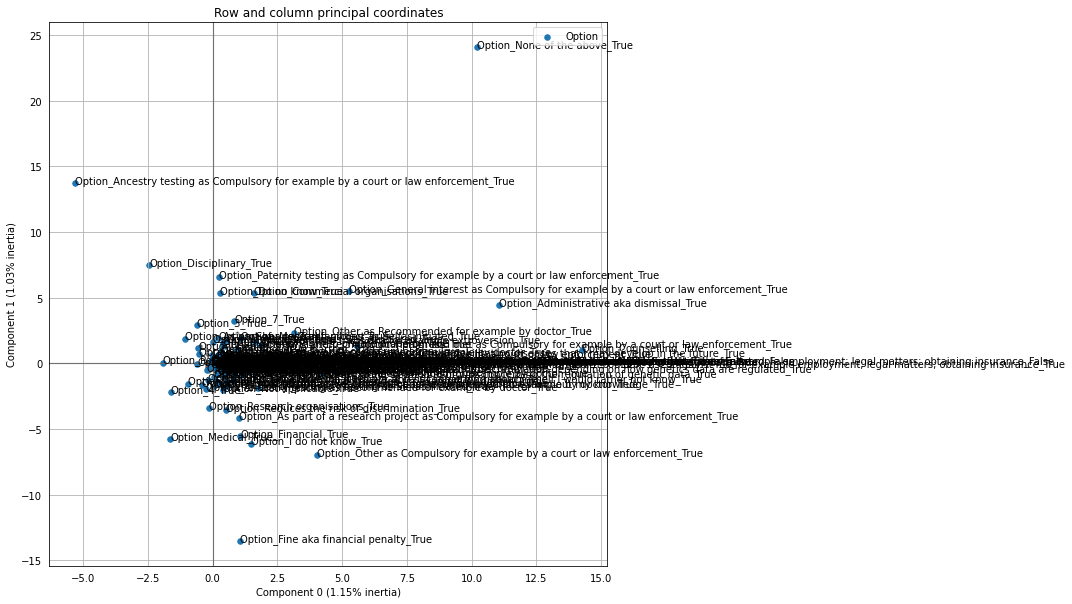

In [122]:
mca.plot_coordinates(newx.iloc[:,2:348],
                     row_points_alpha=.2,
                     figsize=(10, 10),
                     show_column_labels=True
                    );

In [123]:
#### Only Gr

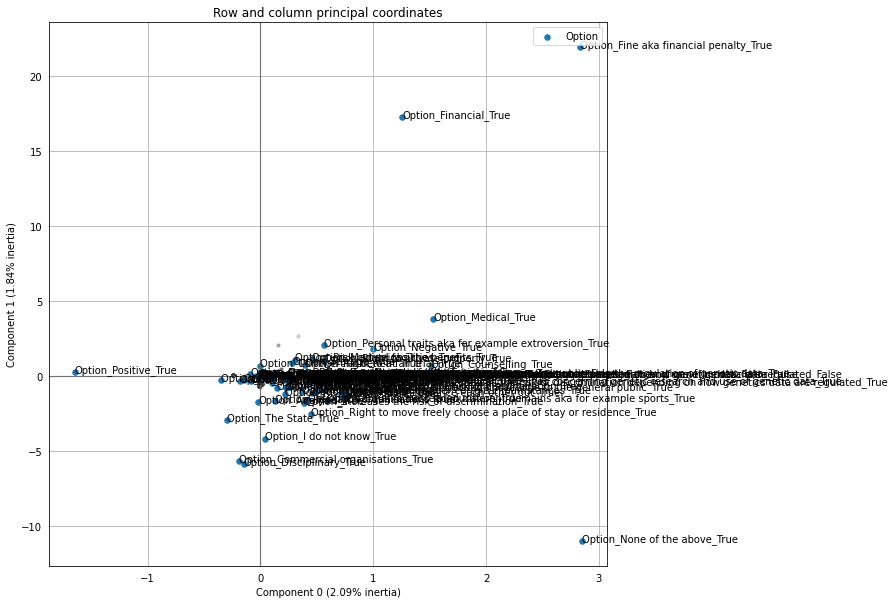

In [124]:
nlarge_df = large_df
nlarge_df = nlarge_df[nlarge_df['Tag'] =='HR']
selected_columns = nlarge_df[['Option']]
nlex = selected_columns.copy()
annot = nlarge_df[['id', 'Description']]
selected_columns = nlex[['Option']]
nlex = selected_columns.copy()
onehotnlex =  pd.get_dummies(nlex,drop_first=True)
onehotnlex = onehotnlex.dropna()
onehotnlex.replace({0: "False", 1: "True"}, inplace = True)
newx = pd.concat([annot, onehotnlex], axis=1)
##
mca = prince.MCA(random_state=42)
mca.fit(newx.iloc[:,2:348])
mca.plot_coordinates(newx.iloc[:,2:348],
                     row_points_alpha=.2,
                     figsize=(10, 10),
                     show_column_labels=True
                    );

In [125]:
#### Only Hr

In [126]:
nlarge_df = large_df
nlarge_df = nlarge_df[nlarge_df['Tag'] =='HR']
selected_columns = nlarge_df[['Option']]
nlex = selected_columns.copy()
annot = nlarge_df[['id', 'Description']]
selected_columns = nlex[['Option']]
nlex = selected_columns.copy()
onehotnlex =  pd.get_dummies(nlex,drop_first=True)
onehotnlex = onehotnlex.dropna()
onehotnlex.replace({0: "False", 1: "True"}, inplace = True)
newx = pd.concat([annot, onehotnlex], axis=1)
##
mca = prince.MCA(random_state=42)
mca.fit(newx.iloc[:,2:348])


MCA(random_state=42)

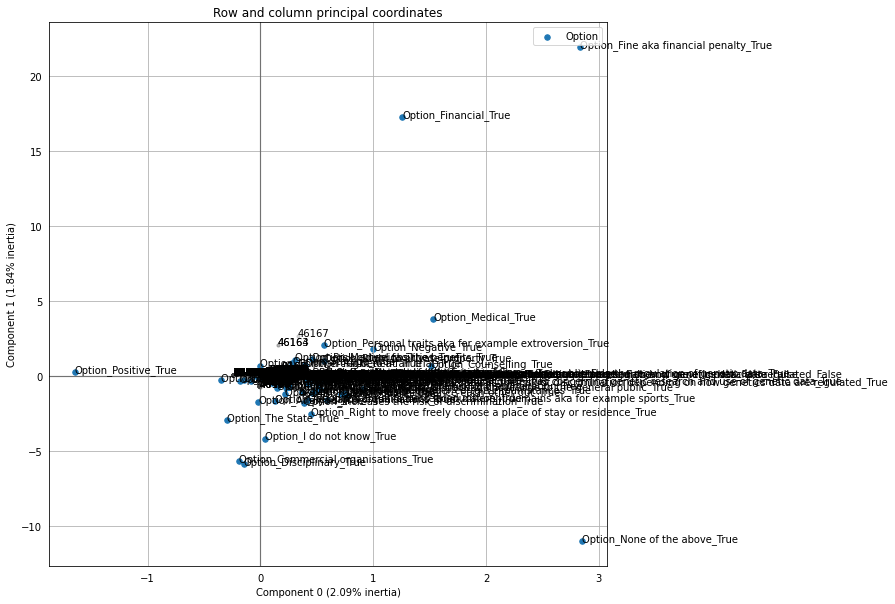

In [127]:
mca.plot_coordinates(newx.iloc[:,2:348],
                     row_points_alpha=.2,
                     figsize=(10, 10),
                     show_column_labels=True,
                     show_row_labels=True
                    );


### on summarised values

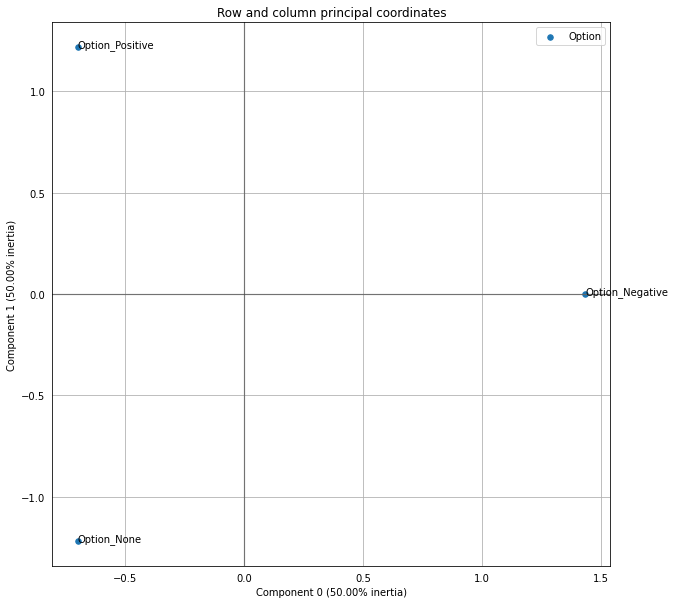

In [128]:
selected_columns = lex[['Description', 'Option', 'Count']]
nlex = selected_columns.copy()
#filter for counts greater than 10
nlex["Count"] = nlex["Count"].map(int)
ndlex = nlex
import prince
mca = prince.MCA(random_state=42)
mca.fit(ndlex.iloc[:,1:2])
mca.plot_coordinates(ndlex.iloc[:,1],
                     row_points_alpha=.2,
                     figsize=(10, 10),
                     show_column_labels=True
                    );

In [129]:
cdf = pdx.groupby(["Group", "Description", "Composite", "Tag", "Variable"])["Option"].agg(lambda x: """','""".join(x[x != ''])).reset_index()
nx = ("""'"""+cdf['Option'].astype(str)+"""'""").apply(lambda x: pd.Series(x)).stack().reset_index() # convert string to series
cdf['rating'] = nx.iloc[:,2]

wo = []
for i in range(len(cdf['rating'])) : 
    wo.append(pd.Series(cdf.iloc[i, 6]).apply(ast.literal_eval).apply(lambda x: pd.Series(x)).stack().value_counts())

    
vc = pd.DataFrame(wo)
ndfx = pd.concat([cdf, vc], axis=1)
del ndfx['Option']


hr = pd.read_csv("/home/mrinalmanu/Documents/iglas_le/metadata.csv", sep=':', low_memory=False)
del hr["Description"]
del hr["Group"]
del hr["Composite"]
del hr["Tag"]
t_hr = pd.merge(ndfx, hr, on='Variable')
del t_hr["rating"]

del t_hr["Variable"]
del t_hr["Option"]



lex = t_hr.set_index(['Group','Description', 'Composite', 'Tag']).stack().reset_index()
# rename columns 2 and 3



lex["Option"] = lex['level_4']
lex["Count"] = lex[0]

del lex['level_4']
del lex[0]




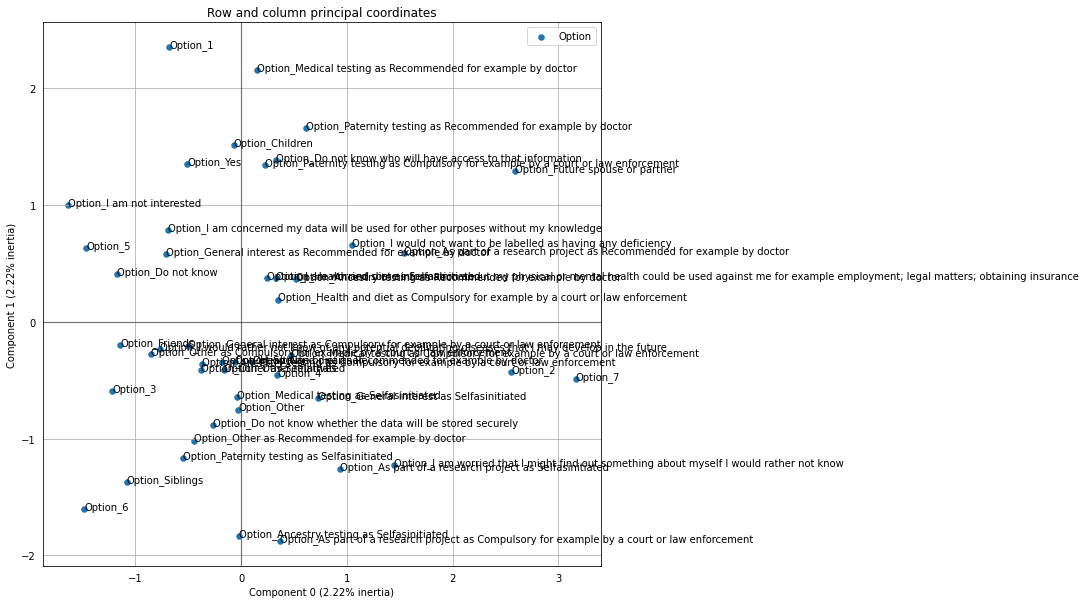

In [130]:
snorlex = lex[lex['Tag'] == 'GR']
xn = snorlex.groupby(['Group','Description', 'Option'])['Count'].mean().round(2).reset_index()
x = snorlex.groupby(['Group','Description', 'Option'])['Count'].mean().round(2)
xf = x.groupby(level=[0, 1]).apply(lambda g: g / g.sum()).round(2).reset_index()

selected_columns = xf[['Description', 'Option', 'Count']]
nlex = selected_columns.copy()

mca = prince.MCA(random_state=42)
mca.fit(nlex.iloc[:,1:2])
mca.plot_coordinates(nlex.iloc[:,1],
                     row_points_alpha=.2,
                     figsize=(10, 10),
                     show_column_labels=True
                    );

How are the variables related to each other. Below the cross are those less likely to go for the values above the cross. But some options are also mutually exclusive. 

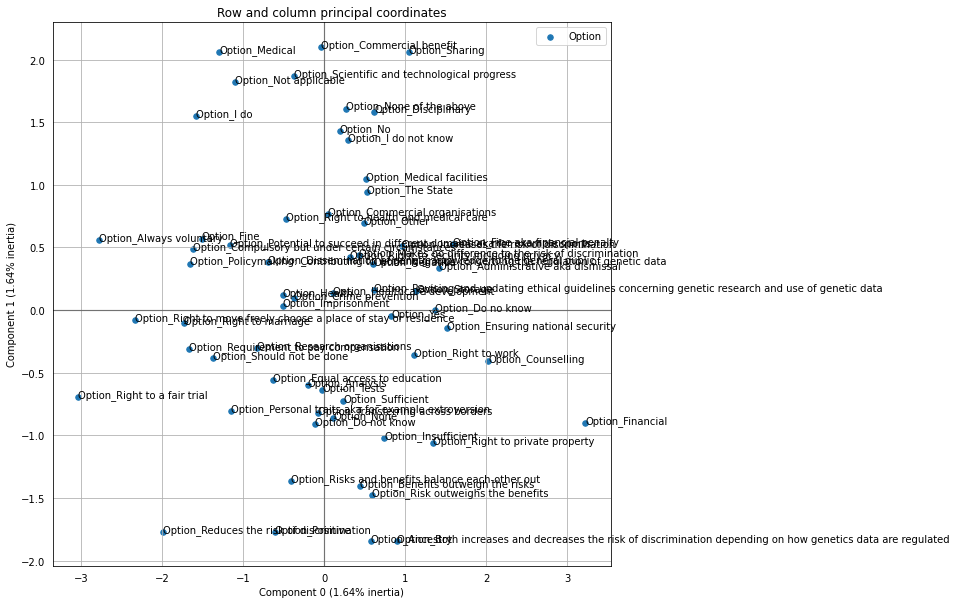

In [131]:
snorlex = lex[lex['Tag'] == 'HR']
xn = snorlex.groupby(['Group','Description', 'Option'])['Count'].mean().round(2).reset_index()
x = snorlex.groupby(['Group','Description', 'Option'])['Count'].mean().round(2)
xf = x.groupby(level=[0, 1]).apply(lambda g: g / g.sum()).round(2).reset_index()

selected_columns = xf[['Description', 'Option', 'Count']]
nlex = selected_columns.copy()

mca = prince.MCA(random_state=42)
mca.fit(nlex.iloc[:,1:2])
mca.plot_coordinates(nlex.iloc[:,1],
                     row_points_alpha=.2,
                     figsize=(10, 10),
                     show_column_labels=True
                    );

# network (show from HTML)

In [132]:
del nx # this variable is causing problems with import networkx as nx

In [133]:
from pyvis.network import Network
from itertools import combinations
import networkx as nx
import nxviz as nv

#### Overall

In [134]:

cdf = large_df
#cdf['Option'] = cdf['Option'].str.replace('Other as Text', '')
#cdf['Option'] = cdf['Option'].str.replace('Other', '')

cdf = cdf.groupby(["id", "Group", "Description", "Tag"])["Option"].agg(lambda x: """','""".join(x[x != ''])).reset_index()
nxx = ("""'"""+cdf['Option'].astype(str)+"""'""").apply(lambda x: pd.Series(x)).stack().reset_index() # convert string to series


cdf['rating'] = nxx.iloc[:,2]

# network visualization

# return a list of ratings

split_rating = lambda rank : [[str(y.strip()) for y in x.split('''","''')] for x in rank]

selections = split_rating(cdf['rating'])
new_list = [item[0].split(",") for item in selections]

# flatten list function

def flatten_list(_2d_list):
    flat_list = []
    # Iterate through the outer list
    for element in _2d_list:
        if type(element) is list:
            # If the element is of type list, iterate through the sublist
            for item in element:
                flat_list.append(item)
        else:
            flat_list.append(element)
    return flat_list

# Extract rating connections
rating_connections = list(
    map(lambda x: list(combinations(x[::-1], 2)), new_list)
)

flat_connections = flatten_list(rating_connections)

df_graph = pd.DataFrame.from_records(flat_connections, columns=["From", "To"])

df_graph = df_graph.groupby(["From", "To"]).size().reset_index()
df_graph.columns = ["From", "To", "Count"]
#####

nxdf = large_df
nxdf = nxdf.groupby(["id", "Group", "Option", "Tag"])["Description"].agg(lambda x: """','""".join(x[x != ''])).reset_index()

nxdf = nxdf.drop_duplicates(subset='Option', keep="first")

df_graph['From'] = df_graph['From'].str.replace("""'""", '')
df_graph['To'] = df_graph['To'].str.replace("""'""", '')

n_df_graph = pd.merge(df_graph, nxdf, left_on="From", right_on="Option")

#nx.from_pandas_edgelist(x, 1, 2, edge_attr=True)

del n_df_graph['Option']
del n_df_graph['id']

G = nx.from_pandas_edgelist(
    n_df_graph, source="From", target="To", edge_attr="Count"
)



In [135]:

# dynamic node sizes

scale=1 # Scaling the size of the nodes by 10*degree
d = dict(G.degree)

#Updating dict
d.update((x, scale*y) for x, y in d.items())

#Setting up size attribute
nx.set_node_attributes(G,d,'size')

G2 = Network(height="1080px", width="100%",bgcolor="#FFFFFF",font_color="black",directed=True)
G2.from_nx(G)
G2.show_buttons(filter_=['physics'])
G2.show("network_map.html")

#### GR

In [136]:


cdf = large_df

cdf = cdf.groupby(["id", "Group", "Description", "Tag"])["Option"].agg(lambda x: """','""".join(x[x != ''])).reset_index()
nxx = ("""'"""+cdf['Option'].astype(str)+"""'""").apply(lambda x: pd.Series(x)).stack().reset_index() # convert string to series


cdf['rating'] = nxx.iloc[:,2]

comp_df = cdf
#filter all empty strings from values
comp_df["Tag"] = comp_df["Tag"].map(str)
filter = comp_df["Tag"] == 'GR' ##################### SELECT GR
ncdf = comp_df[filter]


# return a list of ratings

split_rating = lambda rank : [[str(y.strip()) for y in x.split('''","''')] for x in rank]

selections = split_rating(ncdf['rating'])
new_list = [item[0].split(",") for item in selections]



# flatten list function

def flatten_list(_2d_list):
    flat_list = []
    # Iterate through the outer list
    for element in _2d_list:
        if type(element) is list:
            # If the element is of type list, iterate through the sublist
            for item in element:
                flat_list.append(item)
        else:
            flat_list.append(element)
    return flat_list

# Extract rating connections
rating_connections = list(
    map(lambda x: list(combinations(x[::-1], 2)), new_list)
)


flat_connections = flatten_list(rating_connections)

df_graph = pd.DataFrame.from_records(flat_connections, columns=["From", "To"])

df_graph = df_graph.groupby(["From", "To"]).size().reset_index()
df_graph.columns = ["From", "To", "Count"]


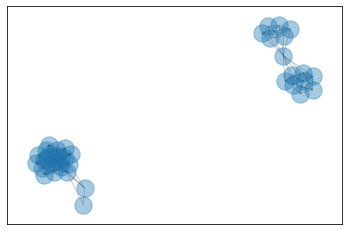

In [137]:


G = nx.convert_matrix.from_pandas_edgelist(
    df_graph, source="From", target="To", edge_attr="Count"
)



#Let's opt for a spring layout
spring_pos = nx.spring_layout(G, seed=2) 

#draw the network
nx.draw_networkx_nodes(G, spring_pos, alpha=0.4)
nx.draw_networkx_edges(G, spring_pos,width = 0.5, alpha=0.4)


In [138]:

# dynamic node sizes

scale=1 # Scaling the size of the nodes by 10*degree
d = dict(G.degree)

#Updating dict
d.update((x, scale*y) for x, y in d.items())

#Setting up size attribute
nx.set_node_attributes(G,d,'size')

G2 = Network(height="1080px", width="100%",bgcolor="#FFFFFF",font_color="black",directed=True)
G2.from_nx(G)
G2.show_buttons(filter_=['physics'])
G2.show("network_map.html")

#### HR

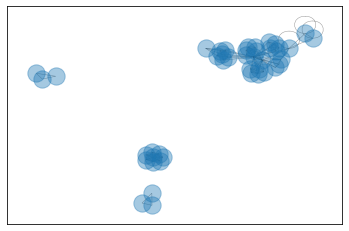

In [139]:


cdf = large_df

cdf = cdf.groupby(["id", "Group", "Description", "Tag"])["Option"].agg(lambda x: """','""".join(x[x != ''])).reset_index()
nxx = ("""'"""+cdf['Option'].astype(str)+"""'""").apply(lambda x: pd.Series(x)).stack().reset_index() # convert string to series


cdf['rating'] = nxx.iloc[:,2]

comp_df = cdf
#filter all empty strings from values
comp_df["Tag"] = comp_df["Tag"].map(str)
filter = comp_df["Tag"] == 'HR' ##################### SELECT GR
ncdf = comp_df[filter]


# return a list of ratings

split_rating = lambda rank : [[str(y.strip()) for y in x.split('''","''')] for x in rank]

selections = split_rating(ncdf['rating'])
new_list = [item[0].split(",") for item in selections]



# flatten list function

def flatten_list(_2d_list):
    flat_list = []
    # Iterate through the outer list
    for element in _2d_list:
        if type(element) is list:
            # If the element is of type list, iterate through the sublist
            for item in element:
                flat_list.append(item)
        else:
            flat_list.append(element)
    return flat_list

# Extract rating connections
rating_connections = list(
    map(lambda x: list(combinations(x[::-1], 2)), new_list)
)


flat_connections = flatten_list(rating_connections)

df_graph = pd.DataFrame.from_records(flat_connections, columns=["From", "To"])

df_graph = df_graph.groupby(["From", "To"]).size().reset_index()
df_graph.columns = ["From", "To", "Count"]


G = nx.convert_matrix.from_pandas_edgelist(
    df_graph, source="From", target="To", edge_attr="Count"
)



#Let's opt for a spring layout
spring_pos = nx.spring_layout(G, seed=2) 

#draw the network
nx.draw_networkx_nodes(G, spring_pos, alpha=0.4)
nx.draw_networkx_edges(G, spring_pos,width = 0.5, alpha=0.4)


In [140]:

# dynamic node sizes

scale=1 # Scaling the size of the nodes by 10*degree
d = dict(G.degree)

#Updating dict
d.update((x, scale*y) for x, y in d.items())

#Setting up size attribute
nx.set_node_attributes(G,d,'size')

G2 = Network(height="1080px", width="100%",bgcolor="#FFFFFF",font_color="black",directed=True)
G2.from_nx(G)
G2.show_buttons(filter_=['physics'])
G2.show("network_map.html")

### SPECIAL

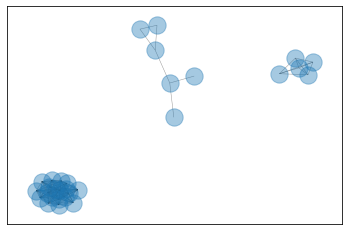

In [141]:

cdf = large_df

cdf = cdf.groupby(["id", "Group", "Description", "Tag"])["Option"].agg(lambda x: """','""".join(x[x != ''])).reset_index()
nxx = ("""'"""+cdf['Option'].astype(str)+"""'""").apply(lambda x: pd.Series(x)).stack().reset_index() # convert string to series


cdf['rating'] = nxx.iloc[:,2]

comp_df = cdf
#filter all empty strings from values
comp_df["Tag"] = comp_df["Tag"].map(str)
filter = comp_df["Tag"] == 'General' ##################### SELECT GR
ncdf = comp_df[filter]


# return a list of ratings

split_rating = lambda rank : [[str(y.strip()) for y in x.split('''","''')] for x in rank]

selections = split_rating(ncdf['rating'])
new_list = [item[0].split(",") for item in selections]



# flatten list function

def flatten_list(_2d_list):
    flat_list = []
    # Iterate through the outer list
    for element in _2d_list:
        if type(element) is list:
            # If the element is of type list, iterate through the sublist
            for item in element:
                flat_list.append(item)
        else:
            flat_list.append(element)
    return flat_list

# Extract rating connections
rating_connections = list(
    map(lambda x: list(combinations(x[::-1], 2)), new_list)
)


flat_connections = flatten_list(rating_connections)

df_graph = pd.DataFrame.from_records(flat_connections, columns=["From", "To"])

df_graph = df_graph.groupby(["From", "To"]).size().reset_index()
df_graph.columns = ["From", "To", "Count"]



G = nx.convert_matrix.from_pandas_edgelist(
    df_graph, source="From", target="To", edge_attr="Count"
)



#Let's opt for a spring layout
spring_pos = nx.spring_layout(G, seed=2) 

#draw the network
nx.draw_networkx_nodes(G, spring_pos, alpha=0.4)
nx.draw_networkx_edges(G, spring_pos,width = 0.5, alpha=0.4)


In [142]:

# dynamic node sizes

scale=1 # Scaling the size of the nodes by 10*degree
d = dict(G.degree)

#Updating dict
d.update((x, scale*y) for x, y in d.items())

#Setting up size attribute
nx.set_node_attributes(G,d,'size')

G2 = Network(height="1080px", width="100%",bgcolor="#FFFFFF",font_color="black",directed=True)
G2.from_nx(G)
G2.show_buttons(filter_=['physics'])
G2.show("network_map.html")

# correlations - theil's U

In [143]:
from dython.nominal import associations
edit_df = large_df

In [144]:
edit_df = edit_df[edit_df['Variable'] != 'LE2.120'] 
edit_df = edit_df[edit_df['Variable'] != 'LE2.121'] 

conf = edit_df[edit_df['Variable'] == 'LE2.132'] 
age = edit_df[edit_df['Variable'] == 'LE2.002']
specials = edit_df[edit_df['Composite'] == 'Special']

edit_df = edit_df[edit_df['Variable'] != 'LE2.132'] 
edit_df = edit_df[edit_df['Variable'] != 'LE2.002'] 
edit_df = edit_df[edit_df['Composite'] != 'Special']


### correlation between age and confidence in gk scores

In [145]:
con_df = pd.merge(age, conf, on='id')

In [146]:
con_df['value_y'] = con_df['value_y'].map(int)
con_df['value_x'] = con_df['value_x'].map(int)

In [147]:
con_df['value_y'].corr(con_df['value_x'])

0.051456295510316406

### categorical

In [148]:

cdf = edit_df.groupby(["Group", "Description", "Variable", "Tag"])["Option"].agg(lambda x: """','""".join(x[x != ''])).reset_index()


#### HR

In [149]:
cdf_hr = cdf[cdf['Tag'] == 'HR']

In [150]:
nx = ("""'"""+cdf_hr['Option'].astype(str)+"""'""").apply(lambda x: pd.Series(x)).stack().reset_index() # convert string to series

cdf_hr['rating'] = nx.iloc[:,2]


In [151]:
cdf_hr = cdf_hr[cdf_hr['rating'].notna()]

In [152]:
wo = []
for i in range(len(cdf_hr['rating'])) : 
    wo.append(pd.Series(cdf_hr.iloc[i, 5]).apply(ast.literal_eval).apply(lambda x: pd.Series(x)).stack().value_counts())
    
vc = pd.DataFrame(wo)

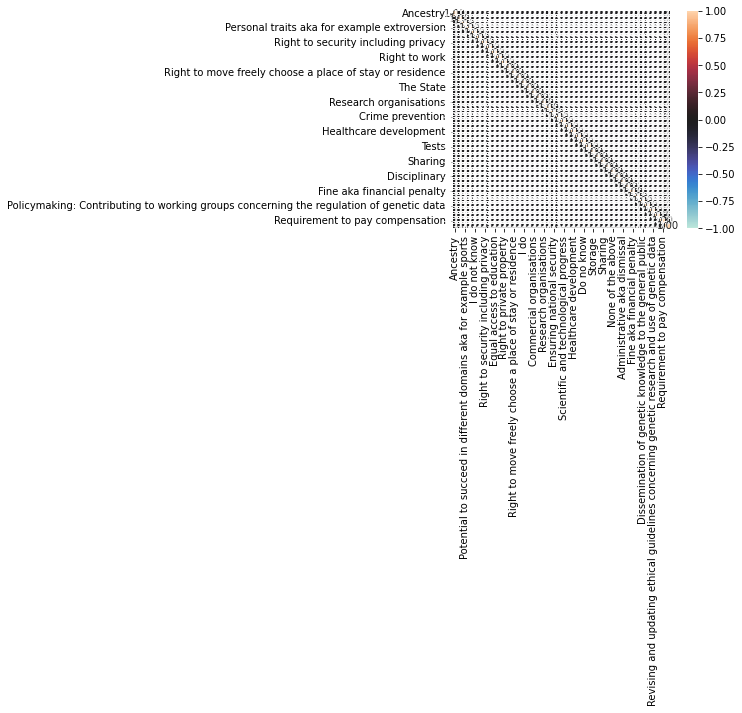

{'corr':                                                     Ancestry    Health  \
 Ancestry                                            1.000000 -0.019231   
 Health                                             -0.019231  1.000000   
 Potential to succeed in different domains aka f... -0.019231 -0.019231   
 Personal traits aka for example extroversion       -0.019231 -0.019231   
 I do not know                                      -0.023650 -0.023650   
 Other                                              -0.029189 -0.029189   
 Right to security including privacy                -0.019231 -0.019231   
 Right to health and medical care                   -0.019231 -0.019231   
 Equal access to education                          -0.019231 -0.019231   
 Right to work                                      -0.019231 -0.019231   
 Right to private property                          -0.019231 -0.019231   
 Right to a fair trial                              -0.019231 -0.019231   
 Right to move fr

In [153]:
associations(vc, nom_nom_assoc = 'theil' ,nan_strategy='replace')

EON

# Sankey experimental (WIP)

In [154]:
import pandas as pd
import plotly.graph_objects as go


In [155]:
pdx

,level_0,index,id,Progress,UserLanguage,Collection,value,Variable,Description,Option,Group,Composite,Tag
0,0,82431.0,0,100,Russian,Pilot,Of Master,LE2.059,Education,Of Master,33,Yes,General
1,1,82432.0,1,100,Russian,Pilot,Of Master,LE2.059,Education,Of Master,33,Yes,General
2,2,82434.0,3,100,Russian,Pilot,Of Master,LE2.059,Education,Of Master,33,Yes,General
3,3,82436.0,5,100,Russian,Pilot,Doctoral degree,LE2.059,Education,Doctoral degree,33,Yes,General
4,4,82437.0,6,100,Spanish,Pilot,Undergraduate,LE2.059,Education,Undergraduate,33,Yes,General
...,...,...,...,...,...,...,...,...,...,...,...,...,...
80111,341198,NaN,1889,62,Russian,Moscow Teachers,None,LE3.085,Genetic science can contribute to the followin...,None,9,Special,HR
80112,341202,NaN,1893,100,Spanish,Spanish Collection,Negative,LE3.085,Genetic science can contribute to the followin...,Negative,9,Special,HR
80113,341212,NaN,1903,85,Spanish,Spanish Collection,None,LE3.085,Genetic science can contribute to the followin...,None,9,Special,HR
80114,341214,NaN,1905,100,Spanish,Spanish Collection,None,LE3.085,Genetic science can contribute to the followin...,None,9,Special,HR


In [156]:
sources = pdx[['id', 'Option']].copy()

Create a new column and codify each unique value and populate by the unique value.
Group data frame by id and get stacked list of options.


Population:
    1) Get the length of list of options
    2) get stacked list of codified options

In [157]:
c = sources.Option.astype('category')

mapping_dict = dict(enumerate(c.cat.categories))

In [158]:
mapping_dict

{0: '0',
 1: '1',
 2: '1 to 4 years',
 3: '10',
 4: '100',
 5: '11',
 6: '11 to 20 years',
 7: '12',
 8: '13',
 9: '14',
 10: '15',
 11: '16',
 12: '17',
 13: '18',
 14: '19',
 15: '2',
 16: '20',
 17: '21',
 18: '21 or more years',
 19: '22',
 20: '23',
 21: '24',
 22: '25',
 23: '26',
 24: '27',
 25: '28',
 26: '29',
 27: '3',
 28: '30',
 29: '31',
 30: '32',
 31: '33',
 32: '34',
 33: '35',
 34: '36',
 35: '37',
 36: '38',
 37: '39',
 38: '4',
 39: '40',
 40: '41',
 41: '42',
 42: '43',
 43: '44',
 44: '45',
 45: '46',
 46: '47',
 47: '48',
 48: '49',
 49: '5',
 50: '5 to 10 years',
 51: '50',
 52: '51',
 53: '52',
 54: '53',
 55: '54',
 56: '55',
 57: '56',
 58: '57',
 59: '58',
 60: '59',
 61: '6',
 62: '6+',
 63: '60',
 64: '61',
 65: '62',
 66: '63',
 67: '64',
 68: '65',
 69: '66',
 70: '67',
 71: '68',
 72: '69',
 73: '7',
 74: '70',
 75: '71',
 76: '72',
 77: '73',
 78: '74',
 79: '75',
 80: '76',
 81: '77',
 82: '79',
 83: '8',
 84: '80',
 85: '81',
 86: '82',
 87: '84',
 88

In [159]:
sources['codes'] = sources.Option.astype('category').cat.codes

In [160]:
sources

,id,Option,codes
0,0,Of Master,259
1,1,Of Master,259
2,3,Of Master,259
3,5,Doctoral degree,155
4,6,Undergraduate,338
...,...,...,...
80111,1889,None,256
80112,1893,Negative,249
80113,1903,None,256
80114,1905,None,256


In [161]:
sources['codes'] = sources['codes'].map(str)
counts = sources.groupby(["id"])["codes"].agg(lambda x: """','""".join(x[x != ''])).reset_index()
nx = ("""'"""+counts['codes'].astype(str)+"""'""").apply(lambda x: pd.Series(x)).stack().reset_index() # convert string to series
counts['xcodes'] = nx.iloc[:,2]
counts

,id,codes,xcodes
0,0,"259','346','157','1','169','260','346','346','...","'259','346','157','1','169','260','346','346',..."
1,1,"259','346','323','49','169','157','2','1','307...","'259','346','323','49','169','157','2','1','30..."
2,2,169,'169'
3,3,"259','346','246','62','233','258','307','307',...","'259','346','246','62','233','258','307','307'..."
4,4,"233','22","'233','22'"
...,...,...,...
1893,1912,"177','254','233','161','320','320','346','205'...","'177','254','233','161','320','320','346','205..."
1894,1913,"99','254','233','34","'99','254','233','34'"
1895,1914,"338','254','233','157','22","'338','254','233','157','22'"
1896,1915,"338','346','194','1','169','258','320','320','...","'338','346','194','1','169','258','320','320',..."


In [162]:
gcounts = sources.groupby(["id"])["Option"].agg(lambda x: """','""".join(x[x != ''])).reset_index()
nx = ("""'"""+gcounts['Option'].astype(str)+"""'""").apply(lambda x: pd.Series(x)).stack().reset_index() # convert string to series
gcounts['xoption'] = nx.iloc[:,2]
gcounts

,id,Option,xoption
0,0,"Of Master','Yes','Education','1','Female','Oth...","'Of Master','Yes','Education','1','Female','Ot..."
1,1,"Of Master','Yes','Statistics and research meth...","'Of Master','Yes','Statistics and research met..."
2,2,Female,'Female'
3,3,"Of Master','Yes','Medicine','6+','Male','Not a...","'Of Master','Yes','Medicine','6+','Male','Not ..."
4,4,"Male','25","'Male','25'"
...,...,...,...
1893,1912,GCSE or equivalent school leavers certificates...,'GCSE or equivalent school leavers certificate...
1894,1913,"A-level or equivalent','No','Male','36","'A-level or equivalent','No','Male','36'"
1895,1914,"Undergraduate','No','Male','Education','25","'Undergraduate','No','Male','Education','25'"
1896,1915,"Undergraduate','Yes','Health and Social Care',...","'Undergraduate','Yes','Health and Social Care'..."


In [163]:
lel = pd.merge(counts, gcounts, on='id')
lel

,id,codes,xcodes,Option,xoption
0,0,"259','346','157','1','169','260','346','346','...","'259','346','157','1','169','260','346','346',...","Of Master','Yes','Education','1','Female','Oth...","'Of Master','Yes','Education','1','Female','Ot..."
1,1,"259','346','323','49','169','157','2','1','307...","'259','346','323','49','169','157','2','1','30...","Of Master','Yes','Statistics and research meth...","'Of Master','Yes','Statistics and research met..."
2,2,169,'169',Female,'Female'
3,3,"259','346','246','62','233','258','307','307',...","'259','346','246','62','233','258','307','307'...","Of Master','Yes','Medicine','6+','Male','Not a...","'Of Master','Yes','Medicine','6+','Male','Not ..."
4,4,"233','22","'233','22'","Male','25","'Male','25'"
...,...,...,...,...,...
1893,1912,"177','254','233','161','320','320','346','205'...","'177','254','233','161','320','320','346','205...",GCSE or equivalent school leavers certificates...,'GCSE or equivalent school leavers certificate...
1894,1913,"99','254','233','34","'99','254','233','34'","A-level or equivalent','No','Male','36","'A-level or equivalent','No','Male','36'"
1895,1914,"338','254','233','157','22","'338','254','233','157','22'","Undergraduate','No','Male','Education','25","'Undergraduate','No','Male','Education','25'"
1896,1915,"338','346','194','1','169','258','320','320','...","'338','346','194','1','169','258','320','320',...","Undergraduate','Yes','Health and Social Care',...","'Undergraduate','Yes','Health and Social Care'..."


In [164]:
del lel['codes']
del lel['Option']
lel

,id,xcodes,xoption
0,0,"'259','346','157','1','169','260','346','346',...","'Of Master','Yes','Education','1','Female','Ot..."
1,1,"'259','346','323','49','169','157','2','1','30...","'Of Master','Yes','Statistics and research met..."
2,2,'169','Female'
3,3,"'259','346','246','62','233','258','307','307'...","'Of Master','Yes','Medicine','6+','Male','Not ..."
4,4,"'233','22'","'Male','25'"
...,...,...,...
1893,1912,"'177','254','233','161','320','320','346','205...",'GCSE or equivalent school leavers certificate...
1894,1913,"'99','254','233','34'","'A-level or equivalent','No','Male','36'"
1895,1914,"'338','254','233','157','22'","'Undergraduate','No','Male','Education','25'"
1896,1915,"'338','346','194','1','169','258','320','320',...","'Undergraduate','Yes','Health and Social Care'..."


In [165]:
wo = []
for i in range(len(counts['xcodes'])) : 
    wo.append(pd.Series(counts.iloc[i, 2]).apply(ast.literal_eval).apply(lambda x: pd.Series(x)).stack().value_counts())

In [166]:
vc = pd.DataFrame(wo)


In [167]:
cxounts = pd.concat([lel, vc], axis=1)

In [168]:
cxounts

,id,xcodes,xoption,282,346,260,249,152,40,314,131,316,266,175,330,324,104,333,3,171,322,214,150,281,297,294,259,176,300,157,1,169,15,128,125,138,254,105,193,303,299,165,304,302,298,301,315,256,307,19,0,103,323,49,2,61,154,153,207,84,21,204,142,163,284,118,121,108,111,241,244,215,258,233,62,246,22,312,201,295,41,155,208,311,232,218,245,242,320,57,16,338,48,4,199,196,206,46,6,83,210,228,223,277,44,29,211,37,50,28,275,272,51,133,191,73,209,58,33,151,39,290,27,306,60,287,328,236,74,194,200,197,30,313,226,305,185,182,205,10,283,14,17,99,45,178,239,35,34,257,325,161,159,23,231,202,149,101,63,186,238,126,38,139,36,177,342,100,162,280,26,130,332,31,279,248,52,278,229,343,96,24,92,20,18,11,59,13,82,167,250,267,79,56,25,309,7,247,55,341,32,65,296,140,184,181,64,68,189,137,136,93,9,224,235,70,286,91,285,234,120,251,117,80,340,168,90,337,47,124,291,255,53,88,321,318,146,54,42,43,156,5,213,269,345,115,69,329,265,261,85,94,253,192,221,264,67,114,203,134,132,127,289,89,326,216,237,339,217,135,276,129,331,225,77,66,222,240,243,188,75,310,164,76,87,112,317,271,274,160,327,172,170,141,86,190,78,12,81,212,263,230,72,97,262,227,123,8,174,98,119,116,180,183,145,273,270,95,148,293,334,158,219,319,110,107,122,143,113,344,147,173,220,166,71,268,187,252,109,106,198,195,288,292,336,335,308,102,179,144
0,0,"'259','346','157','1','169','260','346','346',...","'Of Master','Yes','Education','1','Female','Ot...",14.0,6.0,3.0,3.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,"'259','346','323','49','169','157','2','1','30...","'Of Master','Yes','Statistics and research met...",17.0,6.0,NaN,NaN,4.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,1.0,NaN,1.0,1.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,2.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [169]:
lex = cxounts.set_index(['id','xcodes', 'xoption']).stack().reset_index()

In [170]:
lex

,id,xcodes,xoption,level_3,0
0,0,"'259','346','157','1','169','260','346','346',...","'Of Master','Yes','Education','1','Female','Ot...",282,14.0
1,0,"'259','346','157','1','169','260','346','346',...","'Of Master','Yes','Education','1','Female','Ot...",346,6.0
2,0,"'259','346','157','1','169','260','346','346',...","'Of Master','Yes','Education','1','Female','Ot...",260,3.0
3,0,"'259','346','157','1','169','260','346','346',...","'Of Master','Yes','Education','1','Female','Ot...",249,3.0
4,0,"'259','346','157','1','169','260','346','346',...","'Of Master','Yes','Education','1','Female','Ot...",152,2.0
...,...,...,...,...,...
54058,1916,"'338','346','246','38','233','258','132','132'...","'Undergraduate','Yes','Medicine','4','Male','N...",338,1.0
54059,1916,"'338','346','246','38','233','258','132','132'...","'Undergraduate','Yes','Medicine','4','Male','N...",206,1.0
54060,1916,"'338','346','246','38','233','258','132','132'...","'Undergraduate','Yes','Medicine','4','Male','N...",38,1.0
54061,1916,"'338','346','246','38','233','258','132','132'...","'Undergraduate','Yes','Medicine','4','Male','N...",132,2.0


In [171]:
lex['counts'] = lex[0]
lex['codes'] = lex['level_3']
del lex[0]
del lex['level_3']
lex

,id,xcodes,xoption,counts,codes
0,0,"'259','346','157','1','169','260','346','346',...","'Of Master','Yes','Education','1','Female','Ot...",14.0,282
1,0,"'259','346','157','1','169','260','346','346',...","'Of Master','Yes','Education','1','Female','Ot...",6.0,346
2,0,"'259','346','157','1','169','260','346','346',...","'Of Master','Yes','Education','1','Female','Ot...",3.0,260
3,0,"'259','346','157','1','169','260','346','346',...","'Of Master','Yes','Education','1','Female','Ot...",3.0,249
4,0,"'259','346','157','1','169','260','346','346',...","'Of Master','Yes','Education','1','Female','Ot...",2.0,152
...,...,...,...,...,...
54058,1916,"'338','346','246','38','233','258','132','132'...","'Undergraduate','Yes','Medicine','4','Male','N...",1.0,338
54059,1916,"'338','346','246','38','233','258','132','132'...","'Undergraduate','Yes','Medicine','4','Male','N...",1.0,206
54060,1916,"'338','346','246','38','233','258','132','132'...","'Undergraduate','Yes','Medicine','4','Male','N...",1.0,38
54061,1916,"'338','346','246','38','233','258','132','132'...","'Undergraduate','Yes','Medicine','4','Male','N...",2.0,132


In [172]:
lex['path'] = """'""" + lex["id"].astype(str)+"',"+lex["xcodes"]

In [173]:
lex['label'] = """'""" + lex["id"].astype(str)+"',"+lex["xoption"]

In [174]:
lex['path'] = lex['path'].str.replace("""'""", '')
lex['label'] = lex['label'].str.replace("""'""", '')
lex

,id,xcodes,xoption,counts,codes,path,label
0,0,"'259','346','157','1','169','260','346','346',...","'Of Master','Yes','Education','1','Female','Ot...",14.0,282,"0,259,346,157,1,169,260,346,346,346,152,15,128...","0,Of Master,Yes,Education,1,Female,Other,Yes,Y..."
1,0,"'259','346','157','1','169','260','346','346',...","'Of Master','Yes','Education','1','Female','Ot...",6.0,346,"0,259,346,157,1,169,260,346,346,346,152,15,128...","0,Of Master,Yes,Education,1,Female,Other,Yes,Y..."
2,0,"'259','346','157','1','169','260','346','346',...","'Of Master','Yes','Education','1','Female','Ot...",3.0,260,"0,259,346,157,1,169,260,346,346,346,152,15,128...","0,Of Master,Yes,Education,1,Female,Other,Yes,Y..."
3,0,"'259','346','157','1','169','260','346','346',...","'Of Master','Yes','Education','1','Female','Ot...",3.0,249,"0,259,346,157,1,169,260,346,346,346,152,15,128...","0,Of Master,Yes,Education,1,Female,Other,Yes,Y..."
4,0,"'259','346','157','1','169','260','346','346',...","'Of Master','Yes','Education','1','Female','Ot...",2.0,152,"0,259,346,157,1,169,260,346,346,346,152,15,128...","0,Of Master,Yes,Education,1,Female,Other,Yes,Y..."
...,...,...,...,...,...,...,...
54058,1916,"'338','346','246','38','233','258','132','132'...","'Undergraduate','Yes','Medicine','4','Male','N...",1.0,338,"1916,338,346,246,38,233,258,132,132,346,154,15...","1916,Undergraduate,Yes,Medicine,4,Male,Not app..."
54059,1916,"'338','346','246','38','233','258','132','132'...","'Undergraduate','Yes','Medicine','4','Male','N...",1.0,206,"1916,338,346,246,38,233,258,132,132,346,154,15...","1916,Undergraduate,Yes,Medicine,4,Male,Not app..."
54060,1916,"'338','346','246','38','233','258','132','132'...","'Undergraduate','Yes','Medicine','4','Male','N...",1.0,38,"1916,338,346,246,38,233,258,132,132,346,154,15...","1916,Undergraduate,Yes,Medicine,4,Male,Not app..."
54061,1916,"'338','346','246','38','233','258','132','132'...","'Undergraduate','Yes','Medicine','4','Male','N...",2.0,132,"1916,338,346,246,38,233,258,132,132,346,154,15...","1916,Undergraduate,Yes,Medicine,4,Male,Not app..."


In [175]:
path_list = list(lex.path.unique())
label_list = list(lex.xoption.unique())

In [176]:
sources

,id,Option,codes
0,0,Of Master,259
1,1,Of Master,259
2,3,Of Master,259
3,5,Doctoral degree,155
4,6,Undergraduate,338
...,...,...,...
80111,1889,None,256
80112,1893,Negative,249
80113,1903,None,256
80114,1905,None,256


In [177]:
def zigzag(seq):
    """Return two sequences with alternating elements from `seq`"""
    x, y = [], []
    p, q = x, y
    for e in seq:
        p.append(e)
        p, q = q, p
    return x, y

# flatten list function

def flatten_list(_2d_list):
    flat_list = []
    # Iterate through the outer list
    for element in _2d_list:
        if type(element) is list:
            # If the element is of type list, iterate through the sublist
            for item in element:
                flat_list.append(item)
        else:
            flat_list.append(element)
    return flat_list



In [178]:
y = []
for i in range(len(path_list)):
    y.append(list(path_list[i].split(',')))

big_df = pd.DataFrame()

big_list = []
for i in range(len(y)):
    a, b = list(zip(zigzag(y[i])))
    zig = flatten_list(a)
    zag = flatten_list(b)
    q = list(zip(zig, zag))
    big_list.append(q)

big_df = pd.DataFrame(flatten_list(big_list))

In [179]:
mapping_dict = dict(zip(sources['codes'].map(str), sources['Option'].map(str)))

In [180]:
big_df['Option'] = big_df[1].map(str)

In [181]:
big_df.Option = big_df.Option.replace(mapping_dict)

In [182]:
#### Counting

cdf = pdx.groupby(["Group", "Description", "Composite", "Tag", "Variable"])["Option"].agg(lambda x: """','""".join(x[x != ''])).reset_index()
nx = ("""'"""+cdf['Option'].astype(str)+"""'""").apply(lambda x: pd.Series(x)).stack().reset_index() # convert string to series
cdf['rating'] = nx.iloc[:,2]

wo = []
for i in range(len(cdf['rating'])) : 
    wo.append(pd.Series(cdf.iloc[i, 6]).apply(ast.literal_eval).apply(lambda x: pd.Series(x)).stack().value_counts())

    
vc = pd.DataFrame(wo)
ndfx = pd.concat([cdf, vc], axis=1)
del ndfx['Option']


hr = pd.read_csv("/home/mrinalmanu/Documents/iglas_le/metadata.csv", sep=':', low_memory=False)
del hr["Description"]
del hr["Group"]
del hr["Composite"]
del hr["Tag"]
t_hr = pd.merge(ndfx, hr, on='Variable')
del t_hr["rating"]

del t_hr["Variable"]
del t_hr["Option"]



lex = t_hr.set_index(['Group','Description', 'Composite', 'Tag']).stack().reset_index()
# rename columns 2 and 3



lex["Option"] = lex['level_4']
lex["Count"] = lex[0]

del lex['level_4']
del lex[0]


snorlex = lex
xn = snorlex.groupby(['Group','Description', 'Option'])['Count'].mean().round(2).reset_index()
x = snorlex.groupby(['Group','Description', 'Option'])['Count'].mean().round(2)
xf = x.groupby(level=[0, 1]).apply(lambda g: g / g.sum()).round(2).reset_index()

xn

,Group,Description,Option,Count
0,1,What information can be obtained from your gen...,Ancestry,205.0
1,1,What information can be obtained from your gen...,Health,218.0
2,1,What information can be obtained from your gen...,I do not know,15.0
3,1,What information can be obtained from your gen...,Other,13.0
4,1,What information can be obtained from your gen...,Personal traits aka for example extroversion,62.0
...,...,...,...,...
530,60,Gender,Male,712.0
531,60,Gender,Prefer not to say,23.0
532,7,Do you think people should have the right to d...,Do not know,101.0
533,7,Do you think people should have the right to d...,No,49.0


In [183]:
bdf = big_df

In [184]:
bdf['Counts'] = 1

In [185]:
bdfx = bdf.groupby(["Option"])["Counts"].sum().reset_index()

In [186]:
bdff = pd.merge(bdf, bdfx, on='Option')

In [187]:
bdff

,0,1,Option,Counts_x,Counts_y
0,0,259,Of Master,1,209
1,1,259,Of Master,1,209
2,3,259,Of Master,1,209
3,8,259,Of Master,1,209
4,10,259,Of Master,1,209
...,...,...,...,...,...
40492,241,274,Paternity testing as Recommended for example b...,1,1
40493,271,110,Ancestry testing as Recommended for example by...,1,1
40494,196,198,Health and diet as Compulsory for example by a...,1,1
40495,13,91,88,1,1


In [ ]:
new_big_df = pd.merge(big_df, xn, on='Option')
new_big_df = new_big_df.dropna(how='any')

In [ ]:
xdf = new_big_df.drop_duplicates()

### sankey try

In [ ]:
sources = list(bdff[0])
targets = list(bdff[1])
labels = list(bdff['Option'])
values = list(bdff['Counts_y'])

In [ ]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Sankey(
    node = dict(
      pad = 15,
      thickness = 20,
      line = dict(color = "black", width = 0.5),
      label = labels,
      color = "blue"
    ),
    link = dict(
      source = sources, # indices correspond to labels, eg A1, A2, A1, B1, ...
      target = targets,
    value=values
  ))])



In [ ]:
fig.write_html("/home/mrinalmanu/Documents/iglas_le/sankey.html")